## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
!pip3 install xgboost

  Using cached xgboost-1.6.2-py3-none-win_amd64.whl (125.4 MB)


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing python libraries :

import numpy as np
import pandas as pd
import time
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
# import machine learning and stats libraries:
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
# Import:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
#install scikit-optimize
!pip3 install scikit-optimize
from skopt import BayesSearchCV

  Using cached scikit_optimize-0.9.0-py2.py3-none-any.whl (100 kB)
  Using cached pyaml-21.10.1-py2.py3-none-any.whl (24 kB)


## Exploratory data analysis

In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Examining the dataset imported:
df.shape

(284807, 31)

In [6]:
# Lets check the numeric distribution of the data:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
#Observe the different feature type present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
#check if any null values
df.isnull().sum() 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Here we will observe the distribution of our classes

In [9]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

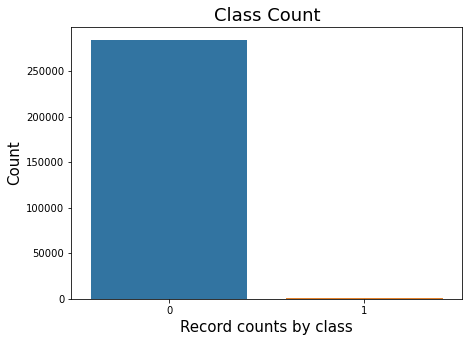

In [10]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(7,5))
sns.countplot(df['Class'])
plt.title("Class Count", fontsize=18)
plt.xlabel("Record counts by class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

In [11]:
print('The percentage of normal transaction is ', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('The percentage of fraud is ', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
print('The ratio of imbalance is', round(df['Class'].value_counts()[1]/df['Class'].value_counts()[0] * 100,2))

The percentage of normal transaction is  99.83 % of the dataset
The percentage of fraud is  0.17 % of the dataset
The ratio of imbalance is 0.17


In [12]:
# Create a scatter plot to observe the distribution of classes with time
Delta_Time = pd.to_timedelta(df['Time'], unit='s')
#Create derived columns Mins and hours
df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)

Text(0.5, 1.05, 'Time vs Class Distribution')

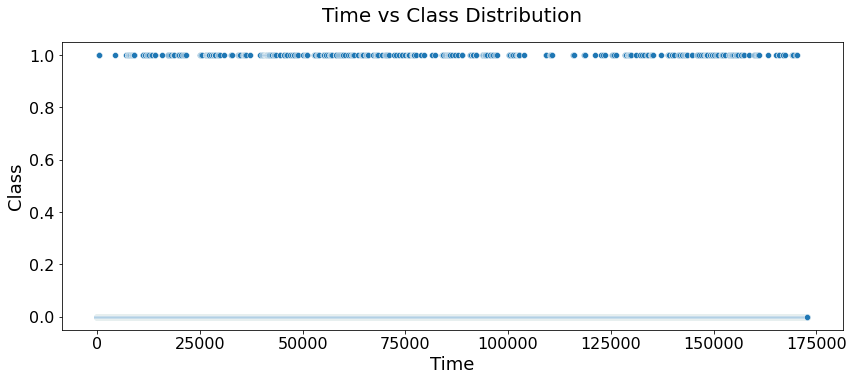

In [13]:
fig = plt.figure(figsize=(14, 18))
cmap = sns.color_palette('Set2')

# PLot the relation between the variables:

plt.subplot(3,1,1)
sns.scatterplot(x=df['Time'], y='Class', palette=cmap, data=df)
plt.xlabel('Time', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('Time vs Class Distribution', size=20, y=1.05)


In [14]:
# Create a scatter plot to observe the distribution of classes with Amount
df_Fraud = df[df['Class'] == 1]
df_Regular = df[df['Class'] == 0]

# Fraud Transaction Amount Statistics
print(df_Fraud["Amount"].describe())

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [15]:
#Regular Transaction Amount Statistics
print(df_Regular["Amount"].describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


Text(0.5, 1.05, 'Amount vs Class Distribution')

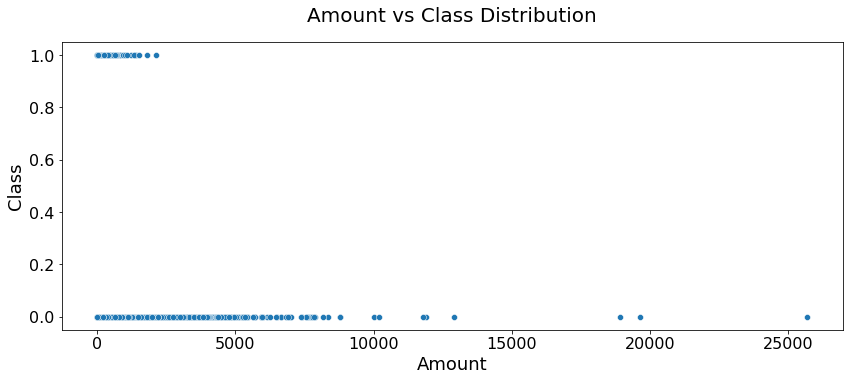

In [16]:
fig = plt.figure(figsize=(14, 18))
cmap = sns.color_palette('Set1')

# PLot the relation between the variables:

plt.subplot(3,1,1)
sns.scatterplot(x=df['Amount'], y='Class', palette=cmap, data=df)
plt.xlabel('Amount', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('Amount vs Class Distribution', size=20, y=1.05)


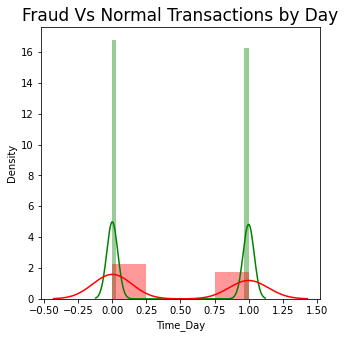

In [17]:
#The fraus Vs normal transaction by day
plt.figure(figsize=(5,5))
sns.distplot(df[df['Class'] == 0]["Time_Day"], color='green')
sns.distplot(df[df['Class'] == 1]["Time_Day"], color='red')
plt.title('Fraud Vs Normal Transactions by Day', fontsize=17)
plt.show()

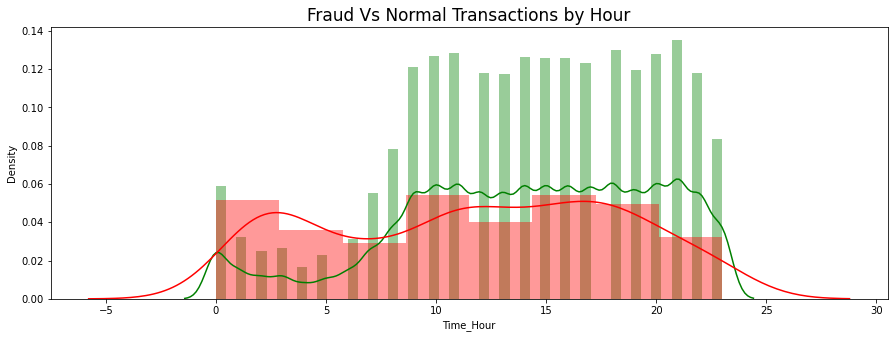

In [18]:
#The fraus Vs normal transaction by hour
plt.figure(figsize=(15,5))
sns.distplot(df[df['Class'] == 0]["Time_Hour"], color='green')
sns.distplot(df[df['Class'] == 1]["Time_Hour"], color='red')
plt.title('Fraud Vs Normal Transactions by Hour', fontsize=17)
plt.show()

In [19]:
# Drop unnecessary columns
df.drop('Time', axis = 1, inplace= True)
df.drop(['Time_Day', 'Time_Min'], axis = 1, inplace= True)

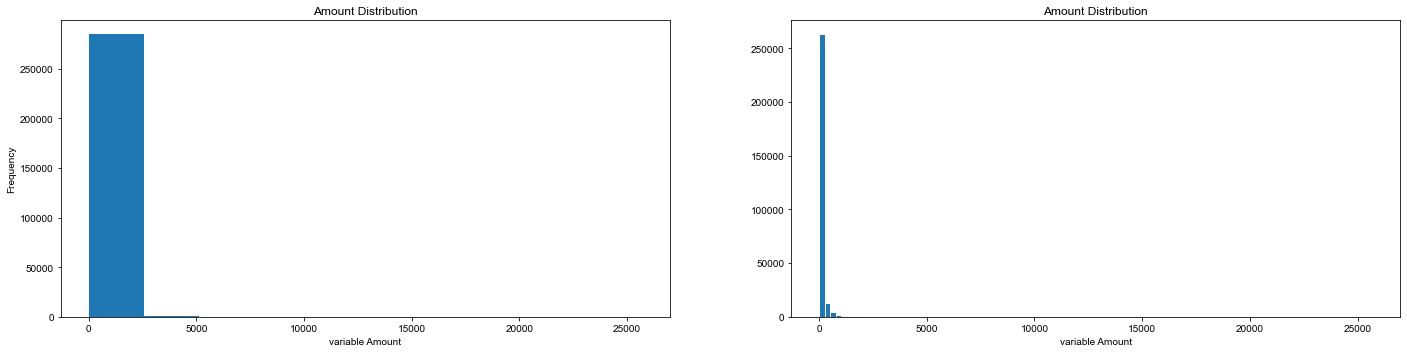

In [20]:
# Let's try to understand the Amount variable as it is not PCA transformed variable :

plt.figure(figsize=(24, 12))

plt.subplot(2,2,1)
plt.title('Amount Distribution')
df['Amount'].astype(int).plot.hist();
plt.xlabel("variable Amount")
#plt.ylabel("Frequency")

plt.subplot(2,2,2)
plt.title('Amount Distribution')
sns.set()
plt.xlabel("variable Amount")
plt.hist(df['Amount'],bins=100)
plt.show()

### Splitting the data into train & test data

In [4]:
#Create X and y dataset for independent and dependent data
y= df['Class'] #class variable
X = df.drop(['Class'], axis=1)

In [10]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20,stratify=y)

In [11]:
print('Train X Size : ', X_train.shape)
print('Train Y Size : ', y_train.shape)
print('Test X Size : ', X_test.shape)
print('Test X Size : ', y_test.shape)

Train X Size :  (227845, 30)
Train Y Size :  (227845,)
Test X Size :  (56962, 30)
Test X Size :  (56962,)


##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [24]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


### Plotting the distribution of a variable

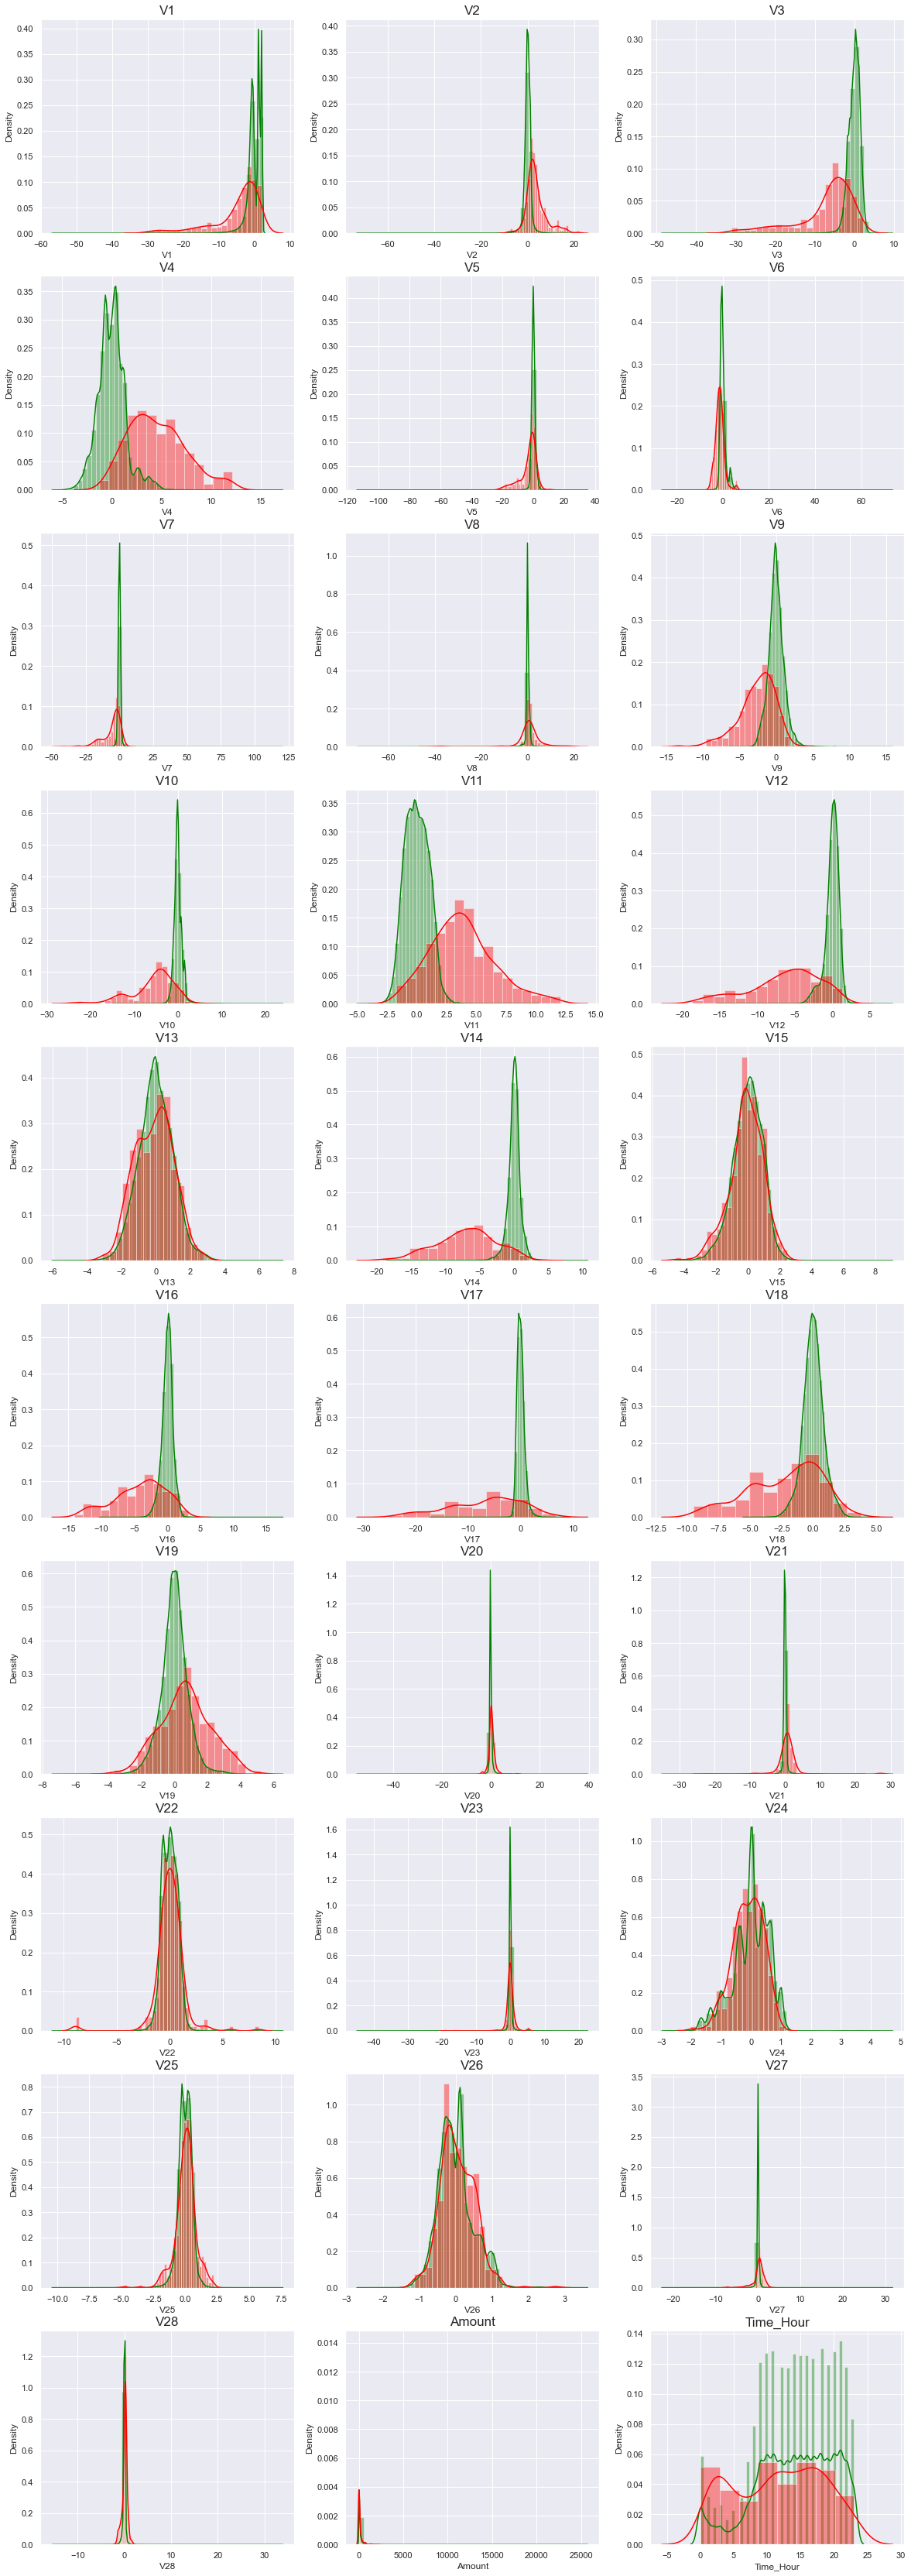

In [32]:
# plot the histogram of a variable from the dataset to see the skewness
cols = list(X.columns.values)
normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][normal_records], color='green')
  sns.distplot(X[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [33]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
pt = PowerTransformer()
pt.fit(X_train)                       ## Fit on training data
X_train_pt = pt.transform(X_train)    ## Then apply on all data
X_test_pt = pt.transform(X_test)

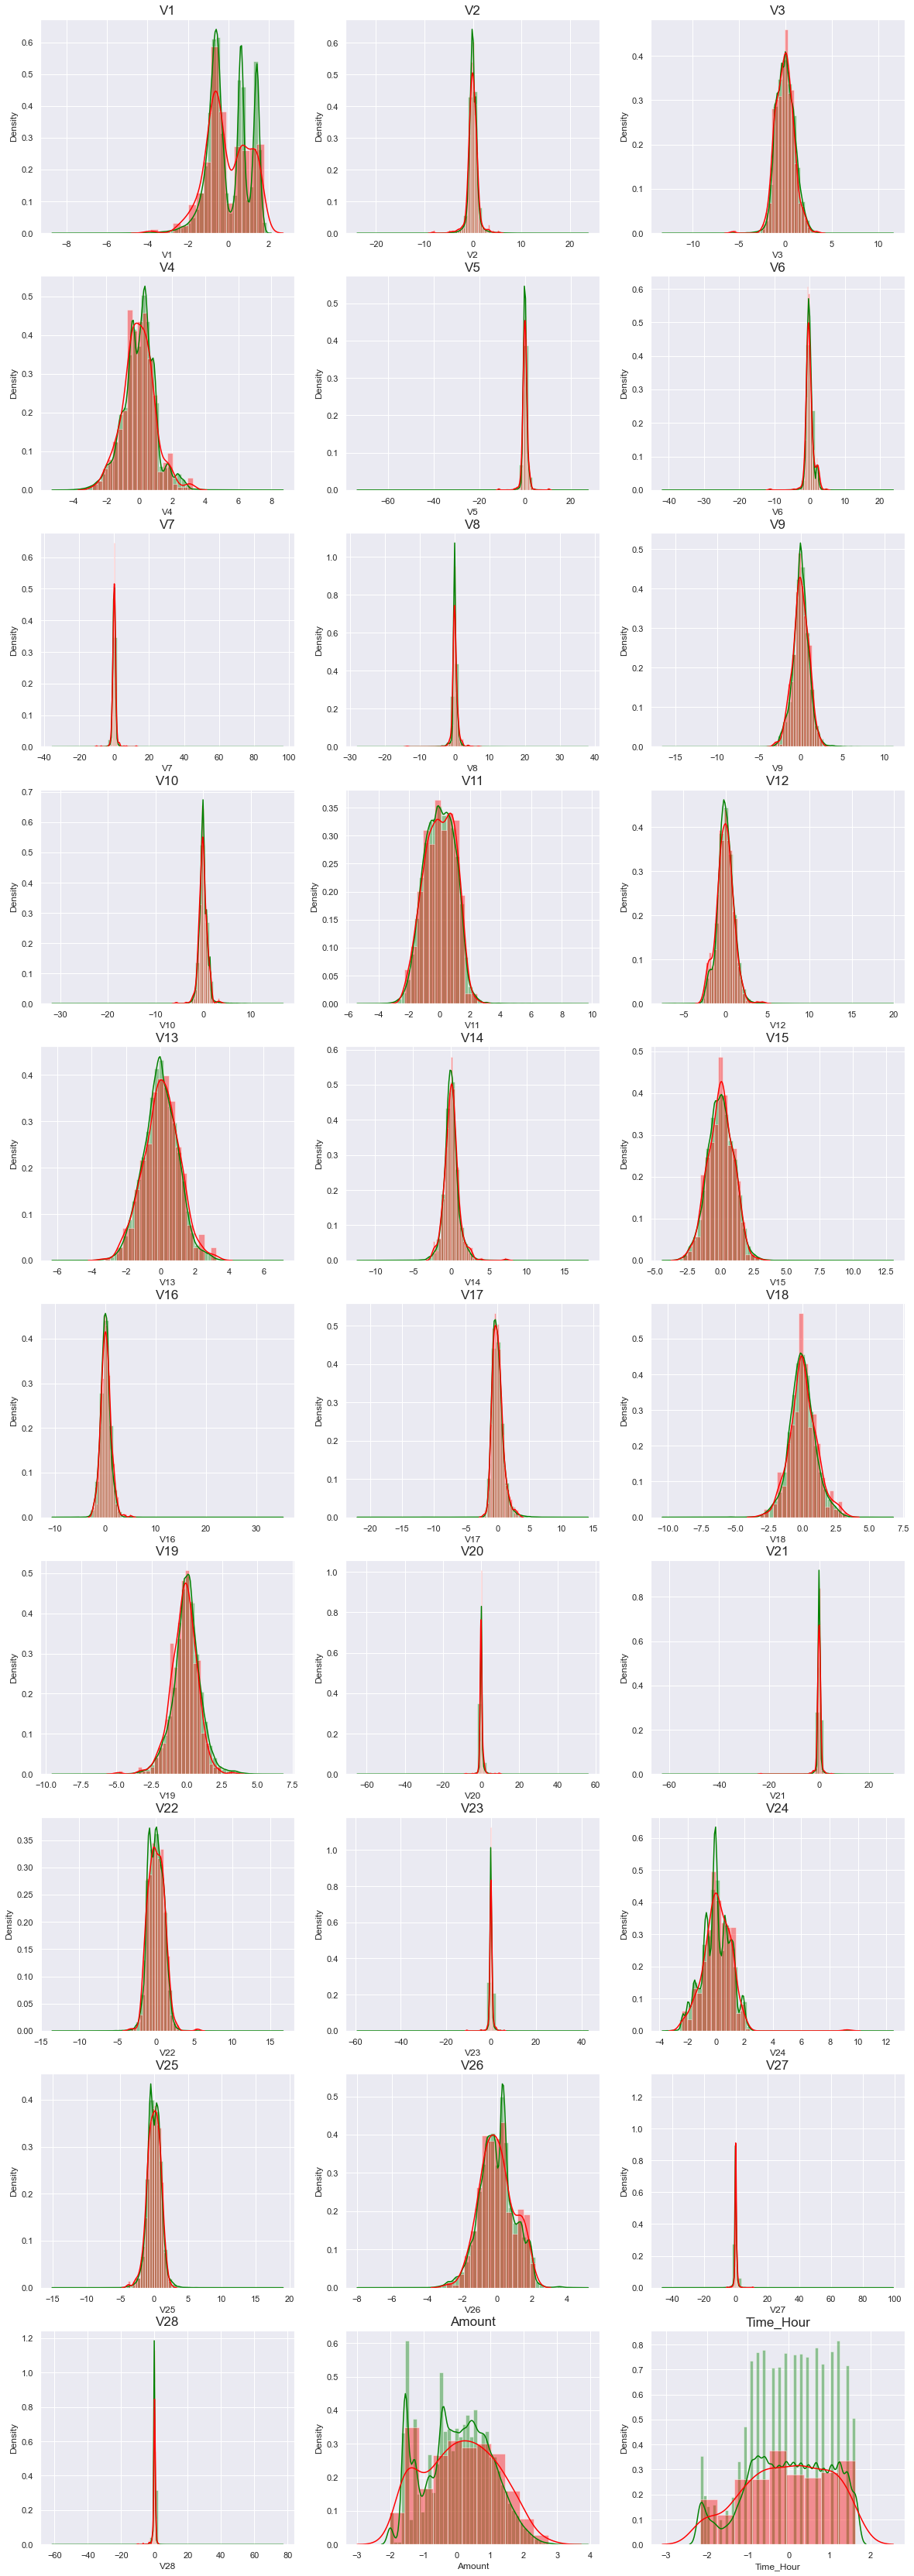

In [34]:
# plot the histogram of a variable from the dataset again to see the result 

X_train_pt_df = pd.DataFrame(data=X_train_pt,   columns=cols)
X_test_pt_df = pd.DataFrame(data=X_test_pt,   columns=cols)

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X_train_pt_df[col][normal_records], color='green')
  sns.distplot(X_train_pt_df[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

## Model Building
- Build different models on the imbalanced dataset and see the result

#### LOGISTIC REGRESSION:

In [86]:
# Using GridSearchCV
params =  {'C':[0.00001, 0.0001, 0.001, 0.01, 0.1,1.0,10,100,1000]}
lr_model_l2 = GridSearchCV(LogisticRegression(penalty='l2',random_state=42,solver='liblinear',tol=10,fit_intercept=True)
                        ,params,cv = 10, scoring = 'roc_auc')
lr_model_l2.fit(X_train, y_train)

print('Best Estimator : ',lr_model_l2.best_estimator_)
print("AUC SCORE : ",lr_model_l2.score(X_test,y_test))

Best Estimator :  LogisticRegression(C=10, random_state=42, solver='liblinear', tol=10)
AUC SCORE :  0.5921206200544371


In [87]:
lr_model_l1 = GridSearchCV(LogisticRegression(penalty='l1',random_state=42,solver='liblinear',tol=10,fit_intercept=True)
                        ,params,cv = 10, scoring = 'roc_auc')
lr_model_l1.fit(X_train, y_train)

print('Best Estimator : ',lr_model_l1.best_estimator_)
print("AUC SCORE : ",lr_model_l1.score(X_test,y_test))

Best Estimator :  LogisticRegression(C=0.01, penalty='l1', random_state=42, solver='liblinear',
                   tol=10)
AUC SCORE :  0.8561962735291078


Accuracy of Logistic model with l2 regularisation : 0.9989993328885924 

Confusion Matrix 



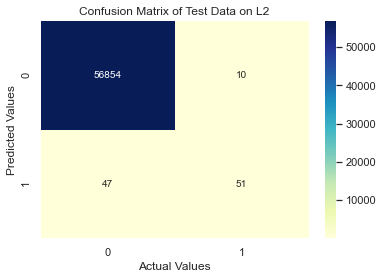

Classification Report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.52      0.64        98

    accuracy                           1.00     56962
   macro avg       0.92      0.76      0.82     56962
weighted avg       1.00      1.00      1.00     56962

l2 roc_value: 0.5921206200544371 

l2 threshold: 0.017426527372023836 

ROC for the test dataset 59.2%


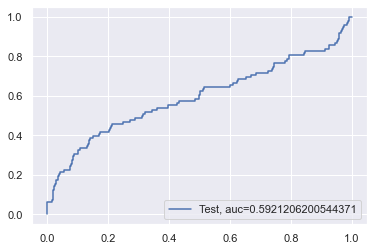

-------------------------------------------------
Accuracy of Logistic model with l1 regularisation : 0.9990168884519505 

Confusion Matrix 



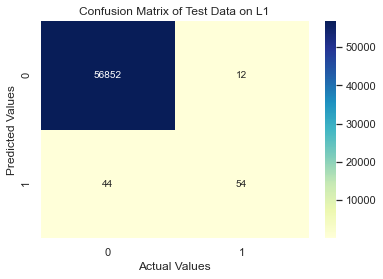

classification Report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.55      0.66        98

    accuracy                           1.00     56962
   macro avg       0.91      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962

l1 roc_value: 0.8561962735291078
l1 threshold: 0.06701840406420435
ROC for the test dataset 85.6%


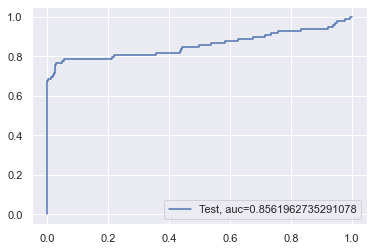

,Data_Imbalance_Handling,Model,Accuracy,roc_value
0,Imbalanced,Logistic Regression L2,0.998999,0.592121
1,Imbalanced,Logistic Regression L1,0.999017,0.856196


In [124]:
#Create a dataframe to store results
df_Results = pd.DataFrame(columns=['Data_Imbalance_Handling','Model','Accuracy','roc_value'])

#Find predicted probabilities
y_pred_probs_l2 = lr_model_l2.predict_proba(X_test)[:,1] 
y_pred_probs_l1 = lr_model_l1.predict_proba(X_test)[:,1] 

# Accuaracy of L2/L1 models
accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

print("Accuracy of Logistic model with l2 regularisation : {0} \n".format(accuracy_l2))
print("Confusion Matrix \n")
true_negetive,false_positive, false_negetive, true_positive = confusion_matrix(y_test, y_pred_l2).ravel()
conMatrix= [[true_negetive,false_positive],[false_negetive,true_positive]]
data = conMatrix
sns.heatmap(data, cmap="YlGnBu", annot=True, fmt="d")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Confusion Matrix of Test Data on L2')
plt.show()


print("Classification Report \n")
print(classification_report(y_test, y_pred_l2))

l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
print("l2 roc_value: {0} \n" .format(l2_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
threshold = thresholds[np.argmax(tpr-fpr)]
print("l2 threshold: {0} \n".format(threshold))
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()
data = {'Data_Imbalance_Handling':'Imbalanced','Model':'Logistic Regression L2','Accuracy':accuracy_l2,'roc_value':l2_roc_value}
df_Results = df_Results.append(data, ignore_index = True)
print("-------------------------------------------------")
print("Accuracy of Logistic model with l1 regularisation : {0} \n".format(accuracy_l1))
print("Confusion Matrix \n")
true_negetive,false_positive, false_negetive, true_positive = confusion_matrix(y_test, y_pred_l1).ravel()
conMatrix= [[true_negetive,false_positive],[false_negetive,true_positive]]
data = conMatrix
sns.heatmap(data, cmap="YlGnBu", annot=True, fmt="d")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Confusion Matrix of Test Data on L1')
plt.show()

print("classification Report \n")
print(classification_report(y_test, y_pred_l1))

l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
print("l1 roc_value: {0}" .format(l1_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
threshold = thresholds[np.argmax(tpr-fpr)]
print("l1 threshold: {0}".format(threshold))
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()
data = {'Data_Imbalance_Handling':'Imbalanced','Model':'Logistic Regression L1','Accuracy':accuracy_l1,'roc_value':l1_roc_value}
df_Results = df_Results.append(data, ignore_index = True)
df_Results.head()

#### KNN:

In [90]:
params =  {'n_neighbors':[1,3,5,7,9,11,15,19,25,29]}
knn_model = GridSearchCV(KNeighborsClassifier(n_jobs=-1)
                        ,params,cv = 10, scoring = 'roc_auc')
knn_model.fit(X_train, y_train)

print('Best Estimator : ',knn_model.best_estimator_)
print("AUC SCORE : ",knn_model.score(X_test,y_test))

Best Estimator :  KNeighborsClassifier(n_jobs=-1, n_neighbors=25)
AUC SCORE :  0.8615723301138126


In [93]:
knn_model

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_jobs=-1),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 15, 19, 25, 29]},
             scoring='roc_auc')

Accuracy of KNN Model : 0.9988764439450862 

Confusion Matrix 



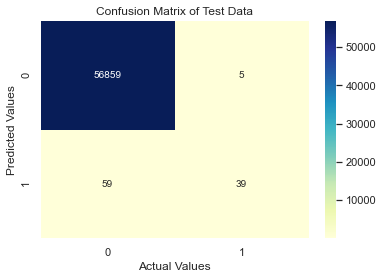

Classification Report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.40      0.55        98

    accuracy                           1.00     56962
   macro avg       0.94      0.70      0.77     56962
weighted avg       1.00      1.00      1.00     56962

KNN roc_value: 0.8615723301138126 

KNN threshold: 0.04 

ROC for the test dataset 86.2%


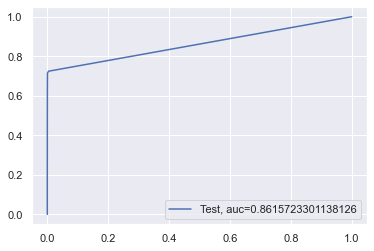

,Data_Imbalance_Handling,Model,Accuracy,roc_value
0,Imbalanced,Logistic Regression L2,0.998999,0.592121
1,Imbalanced,Logistic Regression L1,0.999017,0.856196
2,Imbalanced,KNN,0.998876,0.861572


In [125]:
#Find predicted probabilities
test_neigh = KNeighborsClassifier(n_jobs=-1, n_neighbors=25)
test_neigh.fit(X_train,y_train)

y_pred_probs_knn = test_neigh.predict_proba(X_test)[:,1] 
y_pred_knn = test_neigh.predict(X_test)

# Accuaracy of L2/L1 models
accuracy_knn = metrics.accuracy_score(y_pred=y_pred_knn, y_true=y_test)

print("Accuracy of KNN Model : {0} \n".format(accuracy_knn))
print("Confusion Matrix \n")
true_negetive,false_positive, false_negetive, true_positive = confusion_matrix(y_test, y_pred_knn).ravel()
conMatrix= [[true_negetive,false_positive],[false_negetive,true_positive]]
data = conMatrix
sns.heatmap(data, cmap="YlGnBu", annot=True, fmt="d")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Confusion Matrix of Test Data')
plt.show()


print("Classification Report \n")
print(classification_report(y_test, y_pred_knn))

knn_roc_value = roc_auc_score(y_test, y_pred_probs_knn)
print("KNN roc_value: {0} \n" .format(knn_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_knn)
threshold = thresholds[np.argmax(tpr-fpr)]
print("KNN threshold: {0} \n".format(threshold))
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()
data = {'Data_Imbalance_Handling':'Imbalanced','Model':'KNN','Accuracy':accuracy_knn,'roc_value':knn_roc_value}
df_Results = df_Results.append(data, ignore_index = True)
df_Results.head()

#### SVM:

In [119]:
tuned_param = [{'alpha':[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]}]
svm_clf = GridSearchCV(SGDClassifier(loss='hinge', penalty='l2'),tuned_param, cv = 10, scoring = 'roc_auc')
svm_clf.fit(X_train,y_train)

print(svm_clf.best_estimator_)
print("AUC Score : ",svm_clf.score(X_test,y_test))

SGDClassifier(alpha=1)
AUC Score :  0.8480283784870166


Accuracy of SVM Model : 0.9992802219023208 

Confusion Matrix 



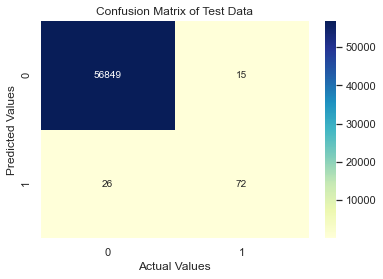

Classification Report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.73      0.78        98

    accuracy                           1.00     56962
   macro avg       0.91      0.87      0.89     56962
weighted avg       1.00      1.00      1.00     56962

SVM L2 roc_value: 0.932123225626773 

L2 threshold: 0.0012498579706851495 

ROC for the test dataset 93.2%


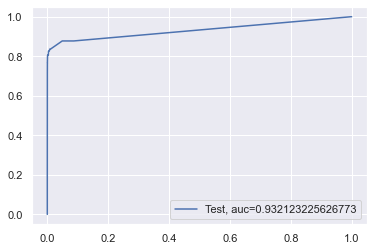

,Data_Imbalance_Handling,Model,Accuracy,roc_value
0,Imbalanced,Logistic Regression L2,0.998999,0.592121
1,Imbalanced,Logistic Regression L1,0.999017,0.856196
2,Imbalanced,KNN,0.998876,0.861572
3,Imbalanced,SVM,0.999280,0.932123


In [126]:
#Find predicted probabilities
test_svm = SGDClassifier(loss='hinge', penalty='l2',alpha=1)
test_svm.fit(X_train,y_train)

calibrated_bow_clf = CalibratedClassifierCV(base_estimator=test_svm, cv='prefit', method='isotonic')
calibrated_bow_clf.fit(X_train,y_train)

y_pred_probs_svm = calibrated_bow_clf.predict_proba(X_test)[:,1] 
y_pred_svm = calibrated_bow_clf.predict(X_test)

# Accuaracy of L2/L1 models
accuracy_svm = metrics.accuracy_score(y_pred=y_pred_svm, y_true=y_test)

print("Accuracy of SVM Model : {0} \n".format(accuracy_svm))
print("Confusion Matrix \n")
true_negetive,false_positive, false_negetive, true_positive = confusion_matrix(y_test, y_pred_svm).ravel()
conMatrix= [[true_negetive,false_positive],[false_negetive,true_positive]]
data = conMatrix
sns.heatmap(data, cmap="YlGnBu", annot=True, fmt="d")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Confusion Matrix of Test Data')
plt.show()


print("Classification Report \n")
print(classification_report(y_test, y_pred_svm))

svm_roc_value = roc_auc_score(y_test, y_pred_probs_svm)
print("SVM L2 roc_value: {0} \n" .format(svm_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_svm)
threshold = thresholds[np.argmax(tpr-fpr)]
print("L2 threshold: {0} \n".format(threshold))
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()
data = {'Data_Imbalance_Handling':'Imbalanced','Model':'SVM','Accuracy':accuracy_svm,'roc_value':svm_roc_value}
df_Results = df_Results.append(data, ignore_index = True)
df_Results.head()

#### DECISION TREE:

In [127]:
tuned_param = [{'max_depth':[5,7,9,11,13,14,15,16],
               'min_samples_split':[5, 10, 100, 500]
               }]

dt_model = GridSearchCV(DecisionTreeClassifier(max_features = 'auto'),tuned_param,cv = 10, scoring = 'roc_auc')
dt_model.fit(X_train,y_train)

print(dt_model.best_estimator_)
print("AUC SCORE : ",dt_model.score(X_test,y_test))

DecisionTreeClassifier(max_depth=13, max_features='auto', min_samples_split=500)
AUC SCORE :  0.9063504006695531


Accuracy of Decision Tree Model : 0.9985253326779256 

Confusion Matrix 



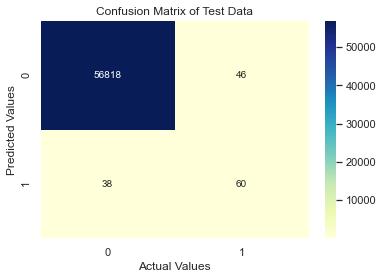

Classification Report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.57      0.61      0.59        98

    accuracy                           1.00     56962
   macro avg       0.78      0.81      0.79     56962
weighted avg       1.00      1.00      1.00     56962

DT roc_value: 0.9488513768619433 

L2 threshold: 0.04477611940298507 

ROC for the test dataset 94.9%


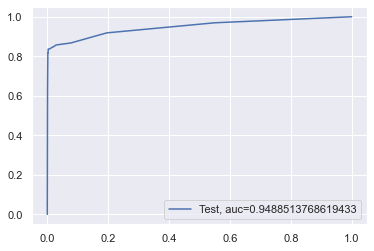

,Data_Imbalance_Handling,Model,Accuracy,roc_value
0,Imbalanced,Logistic Regression L2,0.998999,0.592121
1,Imbalanced,Logistic Regression L1,0.999017,0.856196
2,Imbalanced,KNN,0.998876,0.861572
3,Imbalanced,SVM,0.999280,0.932123
4,Imbalanced,DT,0.998525,0.948851


In [128]:
#Find predicted probabilities
test_dt = DecisionTreeClassifier(max_features = 'auto',max_depth =13, min_samples_split=500)
test_dt.fit(X_train,y_train)

calibrated_dt_clf = CalibratedClassifierCV(base_estimator=test_dt, cv='prefit', method='isotonic')
calibrated_dt_clf.fit(X_train,y_train)

y_pred_probs_dt = calibrated_dt_clf.predict_proba(X_test)[:,1] 
y_pred_dt = calibrated_dt_clf.predict(X_test)

# Accuaracy of L2/L1 models
accuracy_dt = metrics.accuracy_score(y_pred=y_pred_dt, y_true=y_test)

print("Accuracy of Decision Tree Model : {0} \n".format(accuracy_dt))
print("Confusion Matrix \n")
true_negetive,false_positive, false_negetive, true_positive = confusion_matrix(y_test, y_pred_dt).ravel()
conMatrix= [[true_negetive,false_positive],[false_negetive,true_positive]]
data = conMatrix
sns.heatmap(data, cmap="YlGnBu", annot=True, fmt="d")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Confusion Matrix of Test Data')
plt.show()


print("Classification Report \n")
print(classification_report(y_test, y_pred_dt))

dt_roc_value = roc_auc_score(y_test, y_pred_probs_dt)
print("DT roc_value: {0} \n" .format(dt_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_dt)
threshold = thresholds[np.argmax(tpr-fpr)]
print("L2 threshold: {0} \n".format(threshold))
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()
data = {'Data_Imbalance_Handling':'Imbalanced','Model':'DT','Accuracy':accuracy_dt,'roc_value':dt_roc_value}
df_Results = df_Results.append(data, ignore_index = True)
df_Results.head()

#### RANDOM FOREST:

In [130]:
from sklearn.model_selection import RandomizedSearchCV

In [140]:
params = {
'n_estimators' : [100, 200, 500, 700],
'max_depth': [5,10,15,20,25,30],
'min_samples_split' : [5,10,20,50,100],
'min_samples_leaf' : [20,30,40,50]}

rf_model = RandomizedSearchCV(RandomForestClassifier(max_features = 'sqrt'),tuned_param,cv = 10, scoring = 'roc_auc',
                              verbose=10,n_jobs=-1)
rf_model.fit(X_train,y_train)

print(rf_model.best_estimator_)
print("AUC SCORE : ",rf_model.score(X_test,y_test))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
RandomForestClassifier(max_depth=14, min_samples_split=10)
AUC SCORE :  0.9728772840030779


Accuracy of Random Forest Model : 0.999385555282469 

Confusion Matrix 



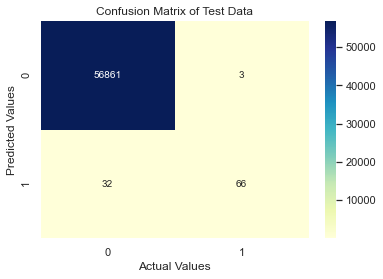

Classification Report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.67      0.79        98

    accuracy                           1.00     56962
   macro avg       0.98      0.84      0.90     56962
weighted avg       1.00      1.00      1.00     56962

RF roc_value: 0.9128387602930874 

Threshold: 0.344 

ROC for the test dataset 91.3%


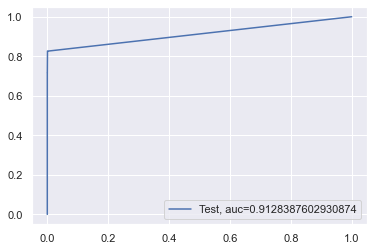

,Data_Imbalance_Handling,Model,Accuracy,roc_value
0,Imbalanced,Logistic Regression L2,0.998999,0.592121
1,Imbalanced,Logistic Regression L1,0.999017,0.856196
2,Imbalanced,KNN,0.998876,0.861572
3,Imbalanced,SVM,0.999280,0.932123
4,Imbalanced,DT,0.998525,0.948851


In [142]:
#Find predicted probabilities
test_rf = RandomForestClassifier(max_features = 'sqrt',max_depth =14, min_samples_split=50,n_estimators = 200)
test_rf.fit(X_train,y_train)

calibrated_rf_clf = CalibratedClassifierCV(base_estimator=test_rf, cv='prefit', method='isotonic')
calibrated_rf_clf.fit(X_train,y_train)

y_pred_probs_rf = calibrated_rf_clf.predict_proba(X_test)[:,1] 
y_pred_rf = calibrated_rf_clf.predict(X_test)

# Accuaracy of L2/L1 models
accuracy_rf = metrics.accuracy_score(y_pred=y_pred_rf, y_true=y_test)

print("Accuracy of Random Forest Model : {0} \n".format(accuracy_rf))
print("Confusion Matrix \n")
true_negetive,false_positive, false_negetive, true_positive = confusion_matrix(y_test, y_pred_rf).ravel()
conMatrix= [[true_negetive,false_positive],[false_negetive,true_positive]]
data = conMatrix
sns.heatmap(data, cmap="YlGnBu", annot=True, fmt="d")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Confusion Matrix of Test Data')
plt.show()


print("Classification Report \n")
print(classification_report(y_test, y_pred_rf))

rf_roc_value = roc_auc_score(y_test, y_pred_probs_rf)
print("RF roc_value: {0} \n" .format(rf_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_rf)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold: {0} \n".format(threshold))
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()
data = {'Data_Imbalance_Handling':'Imbalanced','Model':'RF','Accuracy':accuracy_rf,'roc_value':rf_roc_value}
df_Results = df_Results.append(data, ignore_index = True)
df_Results.head()

###### Random Forest performed the best in terms of F1 score, Decision Tree performed the best in terms of ROC value.

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

### Random Oversampling

In [6]:
!pip3 install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)
  Using cached scikit_learn-1.1.2-cp39-cp39-win_amd64.whl (7.4 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [5]:
cols = list(X.columns.values)

In [6]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler


skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    ROS = RandomOverSampler(sampling_strategy=0.5)
    X_over, y_over= ROS.fit_resample(X_train, y_train)
  
#Create Dataframe for X_over
X_over = pd.DataFrame(data=X_over,   columns=cols)

In [7]:
y_train.value_counts()

0    227452
1       394
Name: Class, dtype: int64

In [8]:
y_over.value_counts()

0    227452
1    113726
Name: Class, dtype: int64

In [9]:
y_test.value_counts()

0    56863
1       98
Name: Class, dtype: int64

### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

In [12]:
df_Results = pd.DataFrame(columns=['Data_Imbalance_Handling','Model','Accuracy','roc_value'])

##### LOGISTIC REGRESSION:

In [29]:
def LRModel(df_Results, DataImbalance, X_train,y_train, X_test, y_test ):

  # Logistic Regression
  from sklearn import linear_model #import the package
  from sklearn.model_selection import KFold

  num_C = list(np.power(10.0, np.arange(-10, 10)))
  cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

  searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

  searchCV_l1 = linear_model.LogisticRegressionCV(
          Cs=num_C
          ,penalty='l1'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='liblinear'
          ,tol=10
      )
  #searchCV.fit(X_train, y_train)
  searchCV_l2.fit(X_train, y_train)
  searchCV_l1.fit(X_train, y_train)
  print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())
  print ('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())

  #find predicted vallues
  y_pred_l2 = searchCV_l2.predict(X_test)
  y_pred_l1 = searchCV_l1.predict(X_test)
  

  #Find predicted probabilities
  y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 
  y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:,1] 

  # Accuaracy of L2/L1 models
  Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
  Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

  print("Accuracy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))
  print("Confusion Matrix")
  true_negetive,false_positive, false_negetive, true_positive = confusion_matrix(y_test, y_pred_l2).ravel()
  conMatrix= [[true_negetive,false_positive],[false_negetive,true_positive]]
  data = conMatrix
  sns.heatmap(data, cmap="YlGnBu", annot=True, fmt="d")
  plt.xlabel('Actual Values')
  plt.ylabel('Predicted Values')
  plt.title('Confusion Matrix of Test Data on L2')
  plt.show()
  print("classification Report")
  print(classification_report(y_test, y_pred_l2))
  print("Accuracy of Logistic model with l1 regularisation : {0}".format(Accuracy_l1))
  print("Confusion Matrix")
  true_negetive,false_positive, false_negetive, true_positive = confusion_matrix(y_test, y_pred_l1).ravel()
  conMatrix= [[true_negetive,false_positive],[false_negetive,true_positive]]
  data = conMatrix
  sns.heatmap(data, cmap="YlGnBu", annot=True, fmt="d")
  plt.xlabel('Actual Values')
  plt.ylabel('Predicted Values')
  plt.title('Confusion Matrix of Test Data on L1')
  plt.show()
  print("classification Report")
  print(classification_report(y_test, y_pred_l1))

  from sklearn.metrics import roc_auc_score
  l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
  print("l2 roc_value: {0}" .format(l2_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l2 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handling': DataImbalance,'Model': 'Logistic Regression with L2 Regularisation','Accuracy': Accuracy_l2,'roc_value': l2_roc_value}, index=[0]),ignore_index= True)

  l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
  print("l1 roc_value: {0}" .format(l1_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l1 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handling': DataImbalance,'Model': 'Logistic Regression with L1 Regularisation','Accuracy': Accuracy_l1,'roc_value': l1_roc_value}, index=[0]),ignore_index= True)
  return df_Results

Max auc_roc for l2: 0.9867356412133967
Max auc_roc for l1: 0.5
Scores for l2 regularisations
{1: array([[0.61805052, 0.63729475, 0.75897623, 0.92630459, 0.97434947,
        0.98512377, 0.98676637, 0.98697712, 0.98714153, 0.98721986,
        0.98723494, 0.98723494, 0.98723494, 0.98723494, 0.98723494,
        0.98723494, 0.98723494, 0.98723494, 0.98723494, 0.98723494],
       [0.6186524 , 0.63725927, 0.75858918, 0.92542383, 0.97430646,
        0.98506555, 0.98648144, 0.98660637, 0.98670399, 0.98676436,
        0.98677584, 0.98677584, 0.98677584, 0.98677584, 0.98677584,
        0.98677584, 0.98677584, 0.98677584, 0.98677584, 0.98677584],
       [0.61794856, 0.63724949, 0.7590312 , 0.92589084, 0.97397641,
        0.98428833, 0.98585616, 0.98611419, 0.98639143, 0.98649322,
        0.9865185 , 0.9865185 , 0.9865185 , 0.9865185 , 0.9865185 ,
        0.9865185 , 0.9865185 , 0.9865185 , 0.9865185 , 0.9865185 ],
       [0.61437935, 0.63297498, 0.75411597, 0.92608973, 0.97520429,
        0.984991

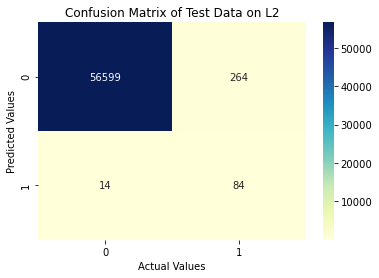

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.24      0.86      0.38        98

    accuracy                           1.00     56961
   macro avg       0.62      0.93      0.69     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix


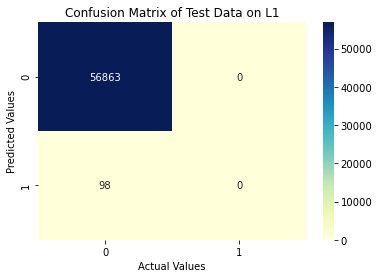

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9821814838169938
l2 threshold: 0.15809350755092205
ROC for the test dataset 98.2%


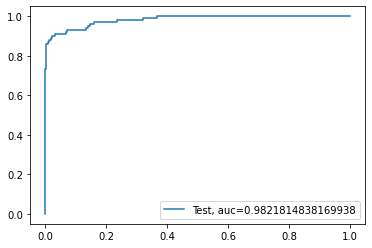

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


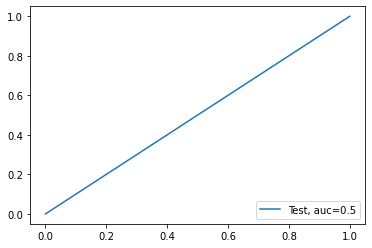

In [24]:
df_Results = LRModel(df_Results , 'Balance_Random_Oversamples' , X_over, y_over, X_test, y_test)

In [25]:
df_Results.head()

,Data_Imbalance_Handling,Model,Accuracy,roc_value,Data_Imbalance_Handiling
0,Balance_Random_Oversamples,Logistic Regression with L2 Regularisation,0.995119,0.982181,NaN
1,NaN,Logistic Regression with L1 Regularisation,0.998280,0.500000,Balance_Random_Oversamples


#### KNN:

In [31]:
def KNNModel(df_Results,DataImbalance, X_train,y_train, X_test, y_test ):
  #Evaluate KNN  model
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.metrics import roc_auc_score
  #create KNN model and fit the model with train dataset
  knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
  knn.fit(X_train,y_train)
  score = knn.score(X_test,y_test)
  print("Model score")
  print(score)
  
  #Accuracy
  y_pred = knn.predict(X_test)
  KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
  print("Confusion Matrix")
  true_negetive,false_positive, false_negetive, true_positive = confusion_matrix(y_test, y_pred).ravel()
  conMatrix= [[true_negetive,false_positive],[false_negetive,true_positive]]
  data = conMatrix
  sns.heatmap(data, cmap="YlGnBu", annot=True, fmt="d")
  plt.xlabel('Actual Values')
  plt.ylabel('Predicted Values')
  plt.title('Confusion Matrix of Test Data on L1')
  plt.show()
  print("classification Report")
  print(classification_report(y_test, y_pred))


  knn_probs = knn.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  knn_roc_value = roc_auc_score(y_test, knn_probs)
  print("KNN roc_value: {0}" .format(knn_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("KNN threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handling': DataImbalance,'Model': 'KNN','Accuracy': score,'roc_value': knn_roc_value}, index=[0]),ignore_index= True)

  return df_Results




Model score
0.9982795245869981
Confusion Matrix


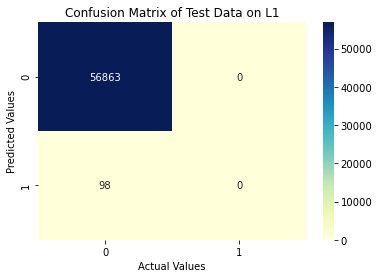

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.5
KNN threshold: 1.0
ROC for the test dataset 50.0%


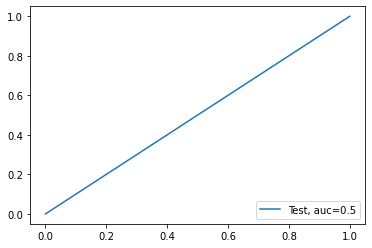

In [31]:
df_Results = KNNModel(df_Results , 'Balance_Random_OverSampling',X_over, y_over, X_test, y_test)

In [32]:
df_Results.head()

,Data_Imbalance_Handling,Model,Accuracy,roc_value,Data_Imbalance_Handiling
0,Balance_Random_Oversamples,Logistic Regression with L2 Regularisation,0.995119,0.982181,NaN
1,NaN,Logistic Regression with L1 Regularisation,0.998280,0.500000,Balance_Random_Oversamples
2,Data_Imbalance_Handling,KNN,0.998280,0.500000,NaN


#### DECISION TREE:

In [34]:
def DTModel(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate Decision Tree model with 'gini' & 'entropy'
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.metrics import roc_auc_score
  criteria = ['gini', 'entropy'] 
  scores = {} 
    
  for c in criteria: 
      dt = DecisionTreeClassifier(criterion = c, random_state=42) 
      dt.fit(X_train, y_train) 
      y_pred = dt.predict(X_test)
      test_score = dt.score(X_test, y_test) 
      tree_preds = dt.predict_proba(X_test)[:, 1]
      tree_roc_value = roc_auc_score(y_test, tree_preds)
      scores = test_score 
      print(c + " score: {0}" .format(test_score))
      print("Confusion Matrix")
      true_negetive,false_positive, false_negetive, true_positive = confusion_matrix(y_test, y_pred).ravel()
      conMatrix= [[true_negetive,false_positive],[false_negetive,true_positive]]
      data = conMatrix
      sns.heatmap(data, cmap="YlGnBu", annot=True, fmt="d")
      plt.xlabel('Actual Values')
      plt.ylabel('Predicted Values')
      plt.title('Confusion Matrix of Test Data')
      plt.show()
      print("classification Report")
      print(classification_report(y_test, y_pred))
      print(c + " tree_roc_value: {0}" .format(tree_roc_value))
      fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
      threshold = thresholds[np.argmax(tpr-fpr)]
      print("Tree threshold: {0}".format(threshold))
      roc_auc = metrics.auc(fpr, tpr)
      print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
      plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
      plt.legend(loc=4)
      plt.show()
  
      df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handling': DataImabalance,'Model': 'Tree Model with {0} criteria'.format(c),'Accuracy': test_score,'roc_value': tree_roc_value}, index=[0]),ignore_index= True)

  return df_Results

gini score: 0.9979810747704569
Confusion Matrix


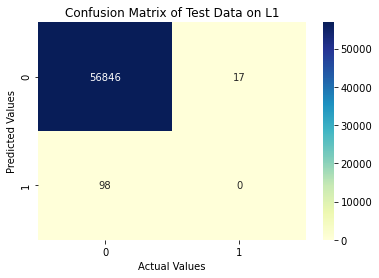

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.49985051791147145
Tree threshold: 2.0
ROC for the test dataset 50.0%


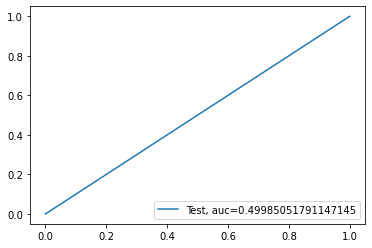

entropy score: 0.9992275416513052
Confusion Matrix


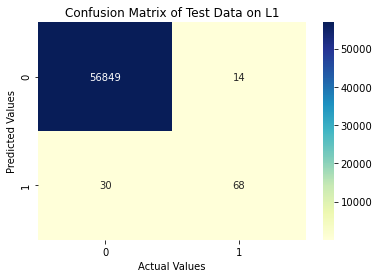

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.83      0.69      0.76        98

    accuracy                           1.00     56961
   macro avg       0.91      0.85      0.88     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8468156726137688
Tree threshold: 1.0
ROC for the test dataset 84.7%


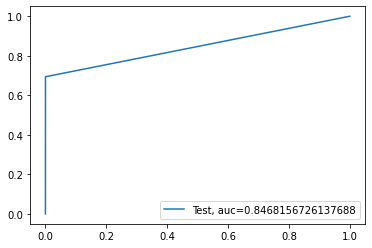

,Data_Imbalance_Handling,Model,Accuracy,roc_value,Data_Imbalance_Handiling
0,Balance_Random_Oversamples,Logistic Regression with L2 Regularisation,0.995119,0.982181,NaN
1,NaN,Logistic Regression with L1 Regularisation,0.998280,0.500000,Balance_Random_Oversamples
2,Data_Imbalance_Handling,KNN,0.998280,0.500000,NaN
3,Balance_Random_OverSampling,Tree Model with gini criteria,0.997981,0.499851,NaN
4,Balance_Random_OverSampling,Tree Model with entropy criteria,0.999228,0.846816,NaN


In [34]:
df_Results = DTModel(df_Results , 'Balance_Random_OverSampling',X_over, y_over, X_test, y_test)
df_Results.head()

#### SVM

In [10]:
def SVMModel(df_Results, DataImbalance, X_train,y_train, X_test, y_test ):
  #Evaluate SVM model with sigmoid kernel  model
  from sklearn.svm import SVC
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import roc_auc_score

  clf = SVC(kernel='sigmoid', random_state=42)
  clf.fit(X_train,y_train)
  y_pred_SVM = clf.predict(X_test)
  SVM_Score = accuracy_score(y_test,y_pred_SVM)
  print("accuracy_score : {0}".format(SVM_Score))
  print("Confusion Matrix")
  true_negetive,false_positive, false_negetive, true_positive = confusion_matrix(y_test, y_pred_SVM).ravel()
  conMatrix= [[true_negetive,false_positive],[false_negetive,true_positive]]
  data = conMatrix
  sns.heatmap(data, cmap="YlGnBu", annot=True, fmt="d")
  plt.xlabel('Actual Values')
  plt.ylabel('Predicted Values')
  plt.title('Confusion Matrix of Test Data')
  plt.show()
      
  print("classification Report")
  print(classification_report(y_test, y_pred_SVM))



  # Run classifier
  classifier = SVC(kernel='sigmoid' , probability=True)
  svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, svm_probs)
  
  print("SVM roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("SVM threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handling': DataImbalance,'Model': 'SVM','Accuracy': SVM_Score,'roc_value': roc_value}, index=[0]),ignore_index= True)

  return df_Results

accuracy_score : 0.0017204754130018785
Confusion Matrix


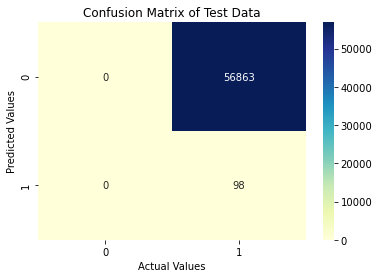

classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     56863
           1       0.00      1.00      0.00        98

    accuracy                           0.00     56961
   macro avg       0.00      0.50      0.00     56961
weighted avg       0.00      0.00      0.00     56961



In [ ]:
df_Results = SVMModel(df_Results , 'Balance_Random_OverSampling',X_over, y_over, X_test, y_test)
df_Results.head()

#### RANDOM FOREST:

In [14]:
def RFModel(df_Results, DataImbalance, X_train,y_train, X_test, y_test ):
  #Evaluate Random Forest model

  from sklearn.ensemble import RandomForestClassifier
  from sklearn.metrics import roc_auc_score

  # Create the model with 100 trees
  RF_model = RandomForestClassifier(n_estimators=100, 
                                bootstrap = True,
                                max_features = 'sqrt', random_state=42)
  # Fit on training data
  RF_model.fit(X_train, y_train)
  RF_test_score = RF_model.score(X_test, y_test)
  RF_model.predict(X_test)

  print('Model Accuracy: {0}'.format(RF_test_score))


  # Actual class predictions
  rf_predictions = RF_model.predict(X_test)

  print("Confusion Matrix")
  true_negetive,false_positive, false_negetive, true_positive = confusion_matrix(y_test, rf_predictions).ravel()
  conMatrix= [[true_negetive,false_positive],[false_negetive,true_positive]]
  data = conMatrix
  sns.heatmap(data, cmap="YlGnBu", annot=True, fmt="d")
  plt.xlabel('Actual Values')
  plt.ylabel('Predicted Values')
  plt.title('Confusion Matrix of Test Data')
  plt.show()
  
  print("classification Report")
  print(classification_report(y_test, rf_predictions))

  # Probabilities for each class
  rf_probs = RF_model.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, rf_probs)

  print("Random Forest roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("Random Forest threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handling': DataImbalance,'Model': 'Random Forest','Accuracy': RF_test_score,'roc_value': roc_value}, index=[0]),ignore_index= True)

  return df_Results

Model Accuracy: 0.9993679886237953
Confusion Matrix


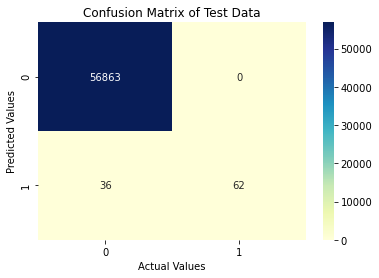

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      0.63      0.78        98

    accuracy                           1.00     56961
   macro avg       1.00      0.82      0.89     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9371429612240232
Random Forest threshold: 0.01
ROC for the test dataset 93.7%


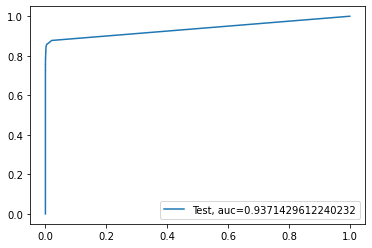

,Data_Imbalance_Handling,Model,Accuracy,roc_value
0,Balance_Random_OverSampling,Random Forest,0.999368,0.937143


In [15]:
df_Results = RFModel(df_Results , 'Balance_Random_OverSampling',X_over, y_over, X_test, y_test)
df_Results.head()

#### XGBOOST:

In [17]:
def XGMModel(df_Results, DataImbalance,X_train,y_train, X_test, y_test ):
  #Evaluate XGboost model
  from xgboost import XGBClassifier
  from sklearn.metrics import roc_auc_score
  # fit model no training data
  XGBmodel = XGBClassifier(random_state=42)
  XGBmodel.fit(X_train, y_train)
  y_pred = XGBmodel.predict(X_test)

  XGB_test_score = XGBmodel.score(X_test, y_test)
  print('Model Accuracy: {0}'.format(XGB_test_score))

  print("Confusion Matrix")
  true_negetive,false_positive, false_negetive, true_positive = confusion_matrix(y_test, y_pred).ravel()
  conMatrix= [[true_negetive,false_positive],[false_negetive,true_positive]]
  data = conMatrix
  sns.heatmap(data, cmap="YlGnBu", annot=True, fmt="d")
  plt.xlabel('Actual Values')
  plt.ylabel('Predicted Values')
  plt.title('Confusion Matrix of Test Data')
  plt.show()
  
  print("classification Report")
  print(classification_report(y_test, y_pred))
  # Probabilities for each class
  XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  XGB_roc_value = roc_auc_score(y_test, XGB_probs)

  print("XGboost roc_value: {0}" .format(XGB_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("XGBoost threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handling': DataImbalance,'Model': 'XGBoost','Accuracy': XGB_test_score,'roc_value': XGB_roc_value}, index=[0]),ignore_index= True)

  return df_Results


[20:38:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.9994733238531627
Confusion Matrix


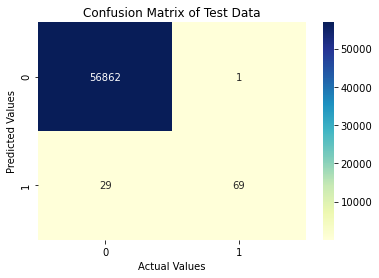

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.70      0.82        98

    accuracy                           1.00     56961
   macro avg       0.99      0.85      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9667632049390462
XGBoost threshold: 7.009059481788427e-05
ROC for the test dataset 96.7%


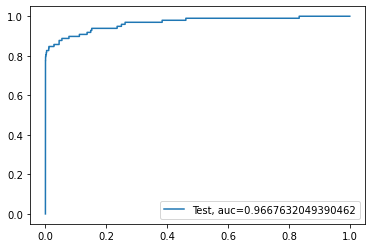

,Data_Imbalance_Handling,Model,Accuracy,roc_value
0,Balance_Random_OverSampling,Random Forest,0.999368,0.937143
1,Balance_Random_OverSampling,XGBoost,0.999473,0.966763


In [18]:
df_Results = XGMModel(df_Results , 'Balance_Random_OverSampling',X_over, y_over, X_test, y_test)
df_Results.head()

### Print the class distribution after applying SMOTE 

In [6]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_Smote, y_train_Smote= SMOTE.fit_resample(X_train, y_train)
  
#Create Dataframe for X_over
X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)

In [7]:
y_train.value_counts()

0    227452
1       394
Name: Class, dtype: int64

In [8]:
y_train_Smote.value_counts()

0    227452
1    227452
Name: Class, dtype: int64

In [16]:
X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
212516,138894.0,-1.298443,1.948100,-4.509947,1.305805,-0.019486,-0.509238,-2.643398,1.283545,-2.515356,...,0.250415,1.178032,1.360989,-0.272013,-0.325948,0.290703,0.841295,0.643094,0.201156,0.01
212644,138942.0,-2.356348,1.746360,-6.374624,1.772205,-3.439294,1.457811,-0.362577,1.443791,-1.927359,...,0.194810,0.857942,0.621203,0.964817,-0.619437,-1.732613,0.108361,1.130828,0.415703,727.91
213092,139107.0,-4.666500,-3.952320,0.206094,5.153525,5.229469,0.939040,-0.635033,-0.704506,-0.234786,...,-2.286137,-0.664263,1.821422,0.113563,-0.759673,-0.502304,0.630639,-0.513880,0.729526,22.47
213116,139117.0,-3.975939,-1.244939,-3.707414,4.544772,4.050676,-3.407679,-5.063118,1.007042,-3.190158,...,2.109403,1.059737,-0.037395,0.348707,-0.162929,0.410531,-0.123612,0.877424,0.667568,8.30
214662,139767.0,0.467992,1.100118,-5.607145,2.204714,-0.578539,-0.174200,-3.454201,1.102823,-1.065016,...,0.589575,0.983481,0.899876,-0.285103,-1.929717,0.319869,0.170636,0.851798,0.372098,120.54


In [12]:
y_test.value_counts()

0    56863
1       98
Name: Class, dtype: int64

##### Build models on other algorithms to see the better performing on SMOTE

#### LR Model:

Max auc_roc for l2: 0.9976702899728009
Max auc_roc for l1: 0.5
Accuracy of Logistic model with l2 regularisation : 0.9963308228437001
Confusion Matrix


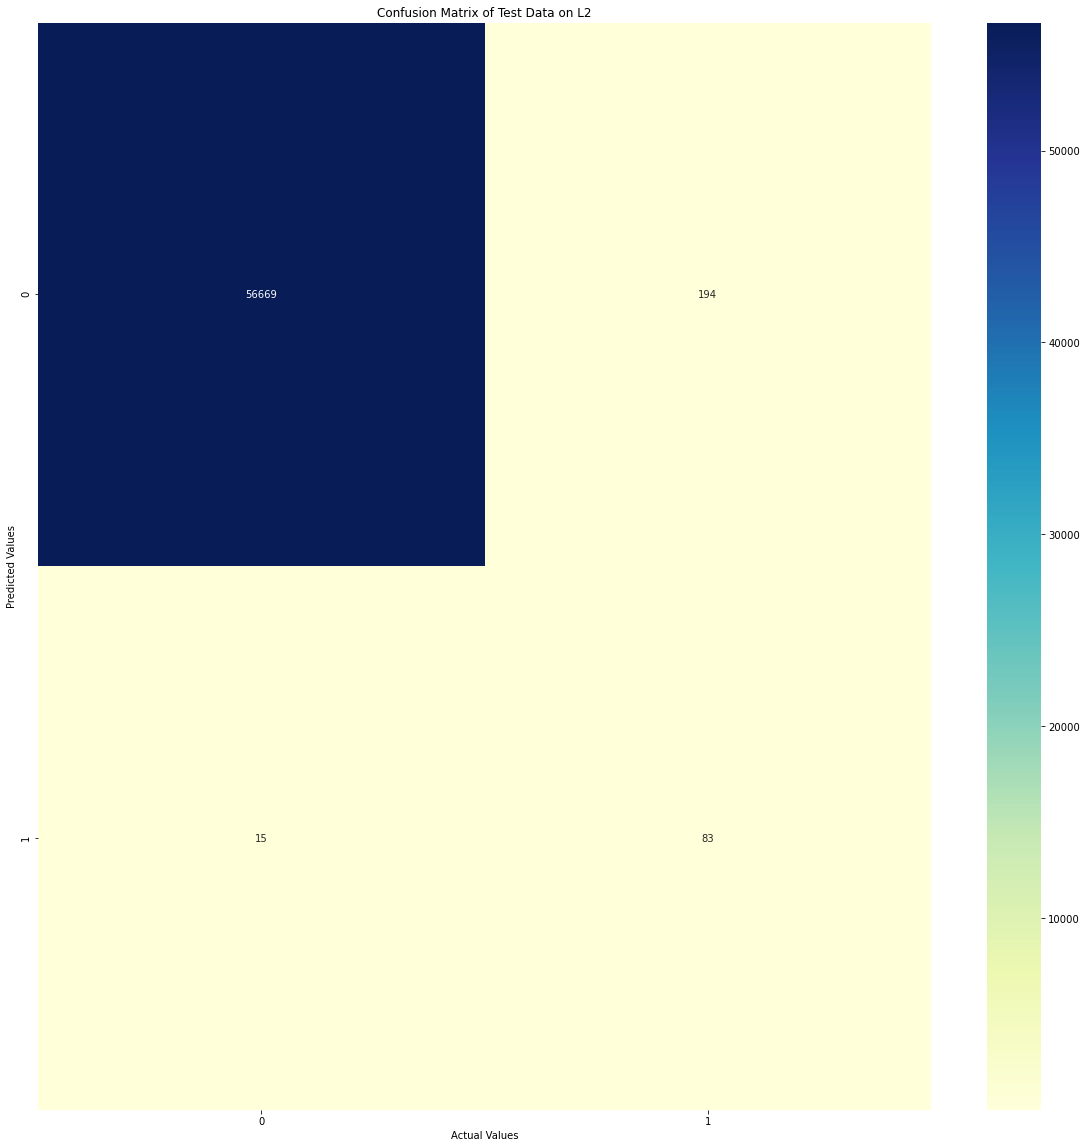

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.30      0.85      0.44        98

    accuracy                           1.00     56961
   macro avg       0.65      0.92      0.72     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix


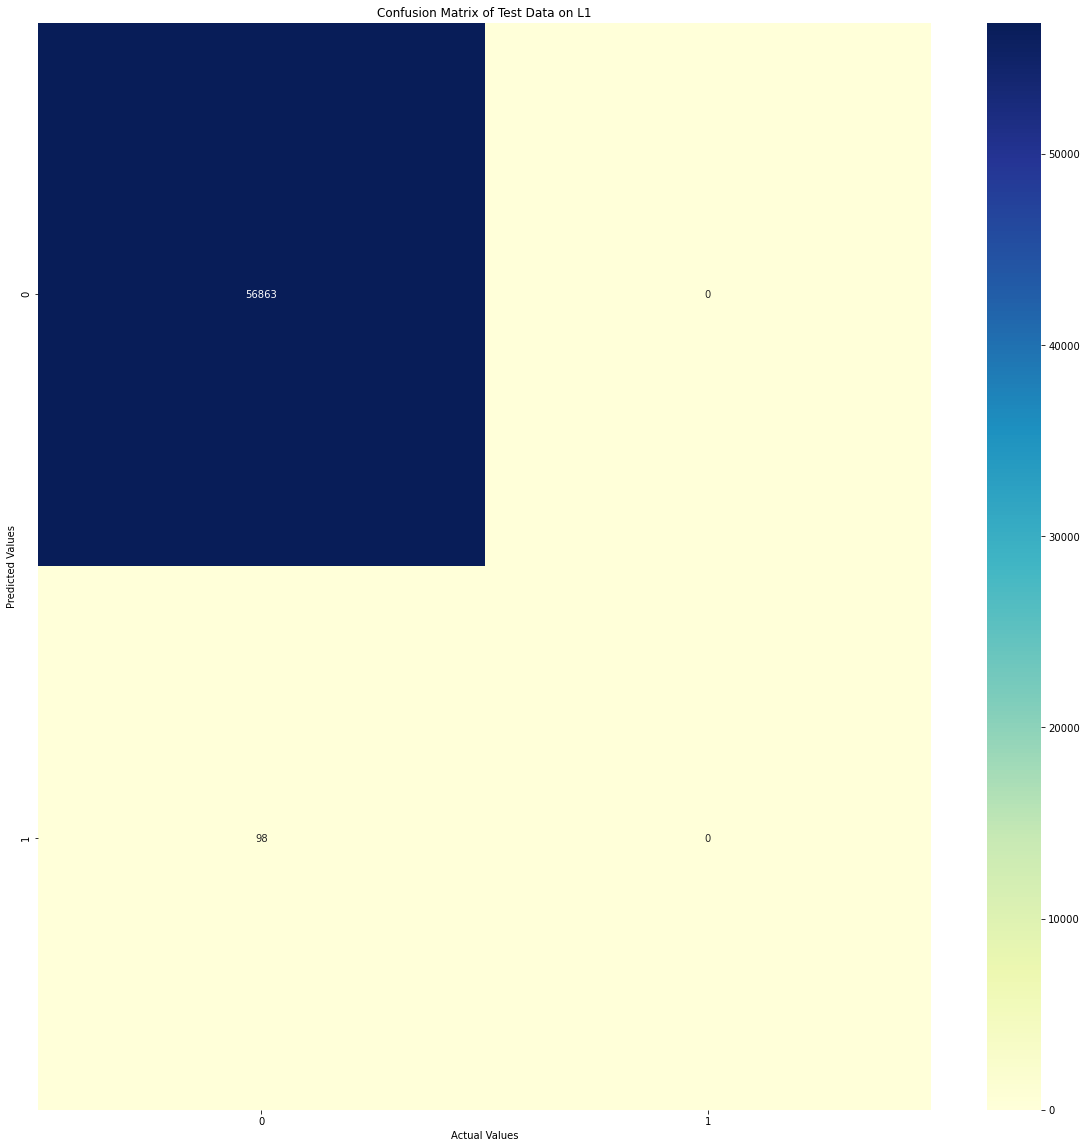

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9788996969802465
l2 threshold: 0.07083854991828836
ROC for the test dataset 97.9%


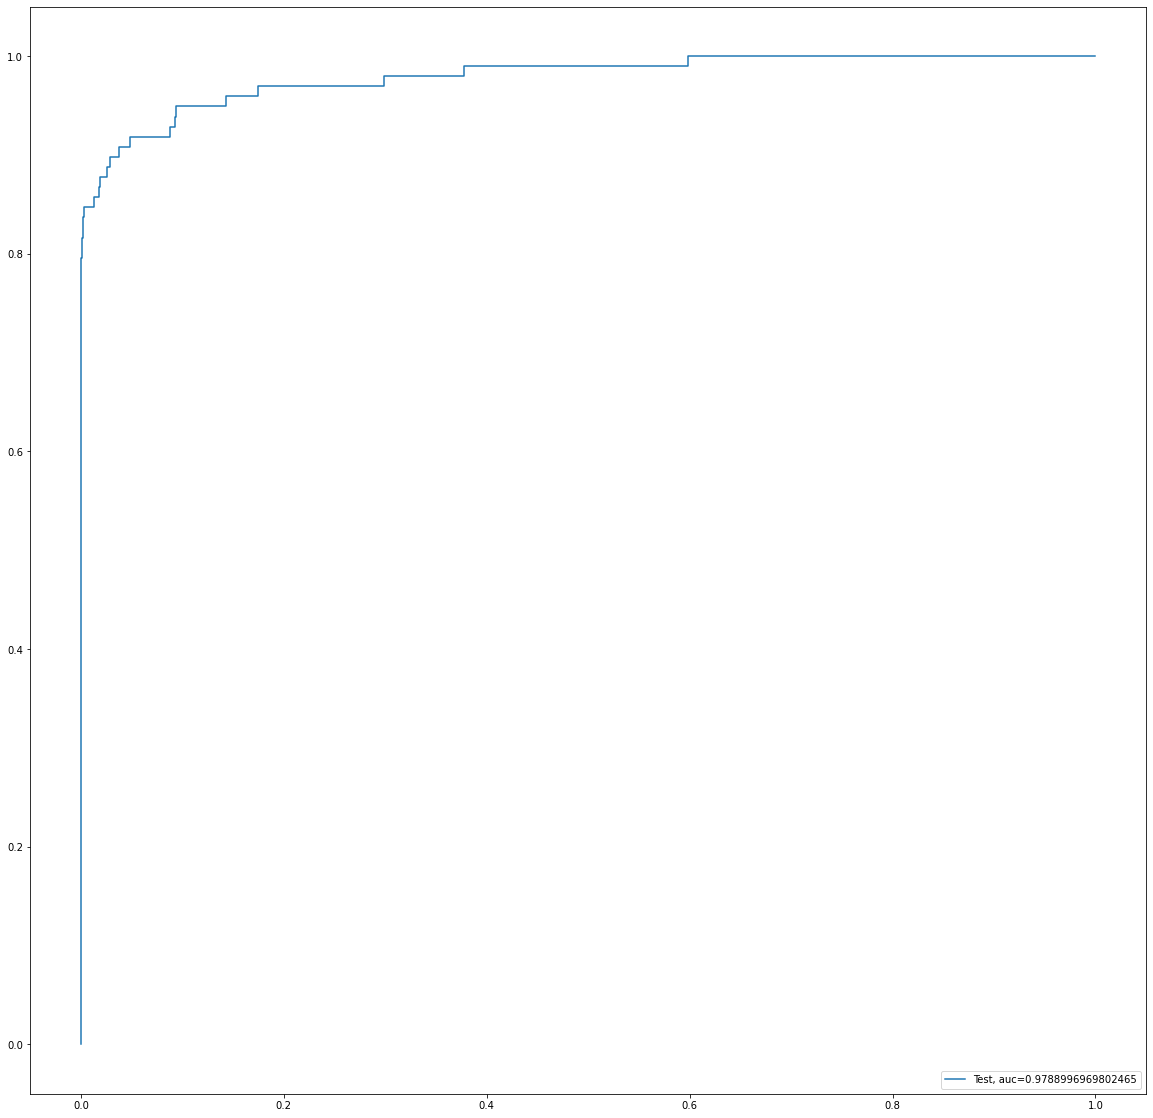

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


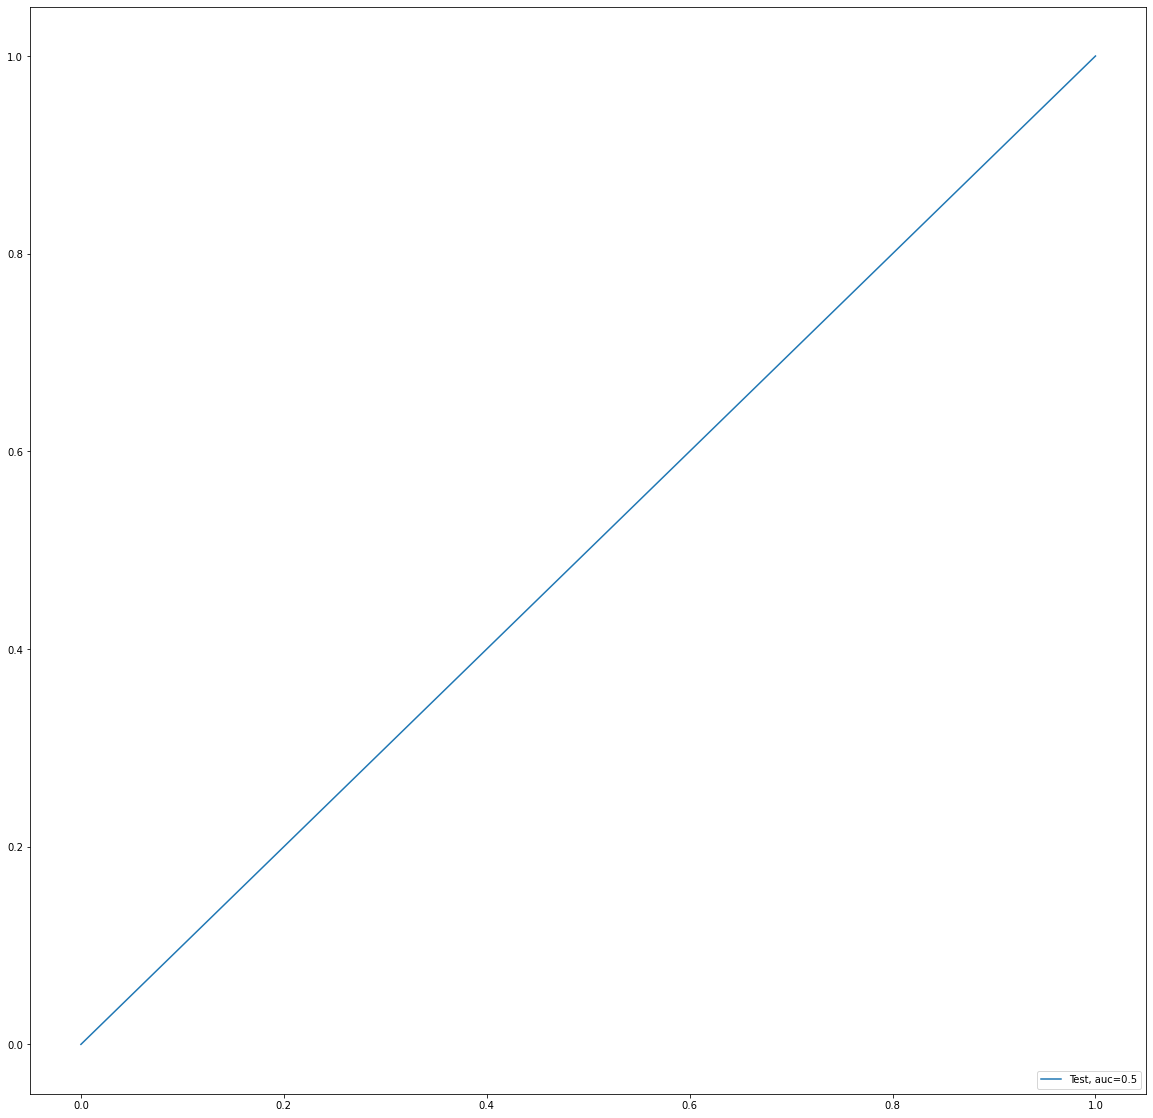

,Data_Imbalance_Handling,Model,Accuracy,roc_value
0,Balance_Random_OverSampling,Random Forest,0.999368,0.937143
1,Balance_Random_OverSampling,XGBoost,0.999473,0.966763
2,Balance_Random_Oversamples,Logistic Regression with L2 Regularisation,0.996331,0.978900
3,Balance_Random_Oversamples,Logistic Regression with L1 Regularisation,0.998280,0.500000


In [28]:
df_Results = LRModel(df_Results , 'Balance_SMOTE' , X_train_Smote, y_train_Smote, X_test, y_test)
df_Results.head()

#### KNN:

Model score
0.9982795245869981
Confusion Matrix


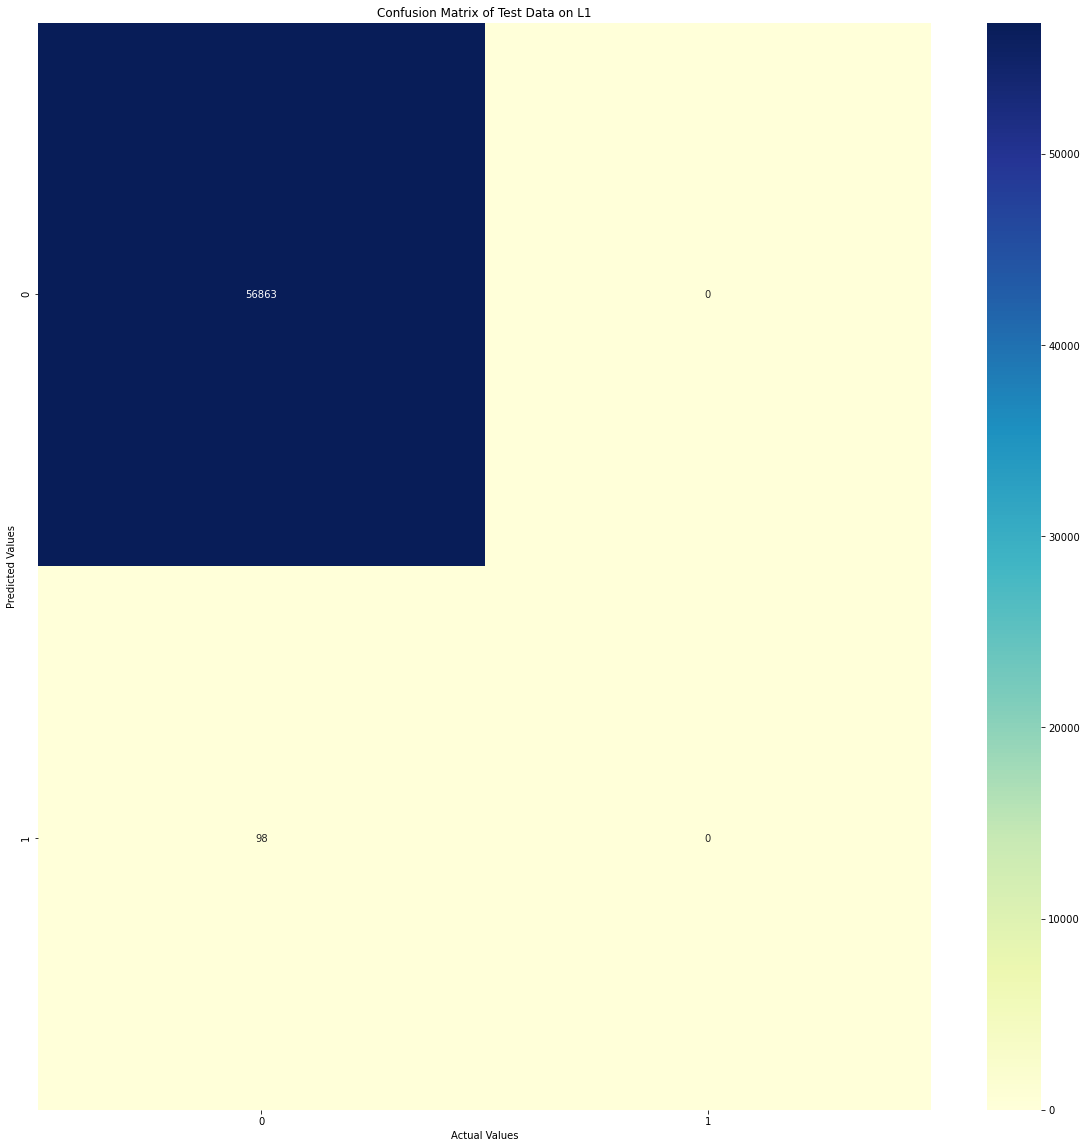

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.5
KNN threshold: 1.0
ROC for the test dataset 50.0%


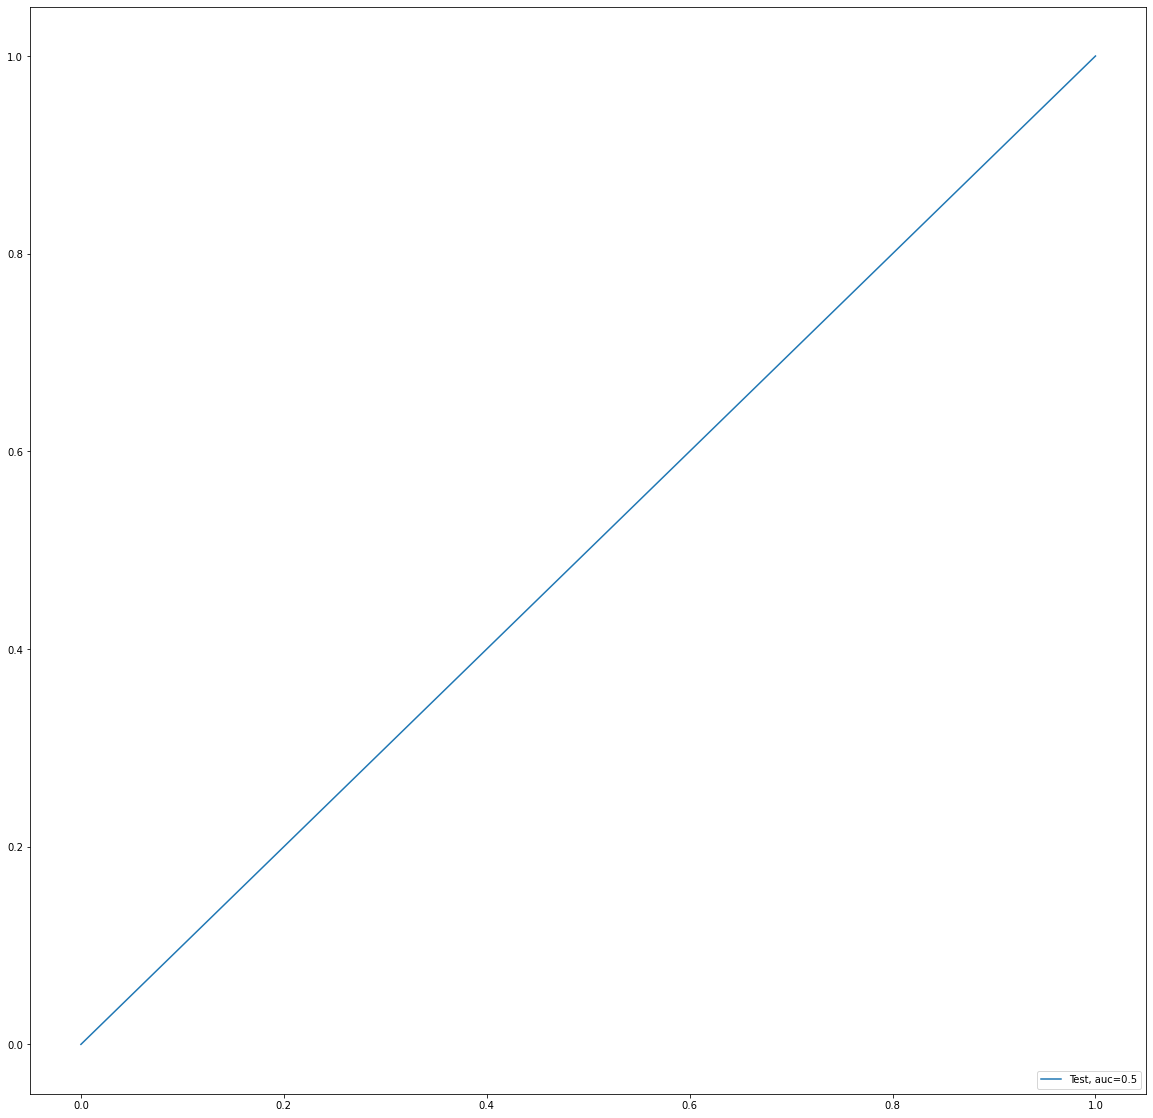

,Data_Imbalance_Handling,Model,Accuracy,roc_value
0,Balance_Random_OverSampling,Random Forest,0.999368,0.937143
1,Balance_Random_OverSampling,XGBoost,0.999473,0.966763
2,Balance_Random_Oversamples,Logistic Regression with L2 Regularisation,0.996331,0.978900
3,Balance_Random_Oversamples,Logistic Regression with L1 Regularisation,0.998280,0.500000
4,Balance_SMOTE,KNN,0.998280,0.500000


In [32]:
df_Results = KNNModel(df_Results , 'Balance_SMOTE' , X_train_Smote, y_train_Smote, X_test, y_test)
df_Results.head()

#### DECISION TREE

gini score: 0.9978932954126508
Confusion Matrix


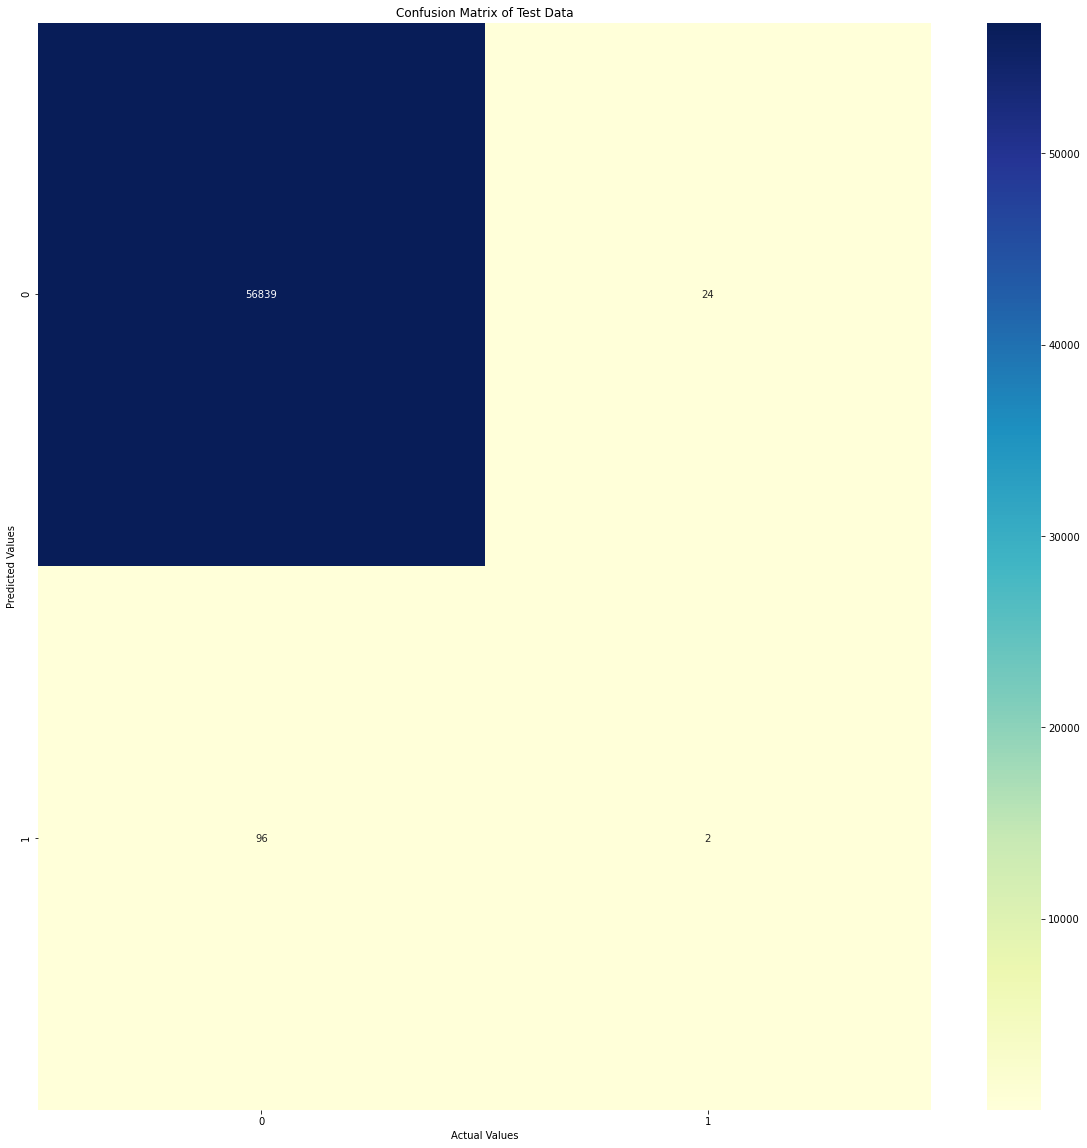

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.08      0.02      0.03        98

    accuracy                           1.00     56961
   macro avg       0.54      0.51      0.52     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.5099930480959068
Tree threshold: 1.0
ROC for the test dataset 51.0%


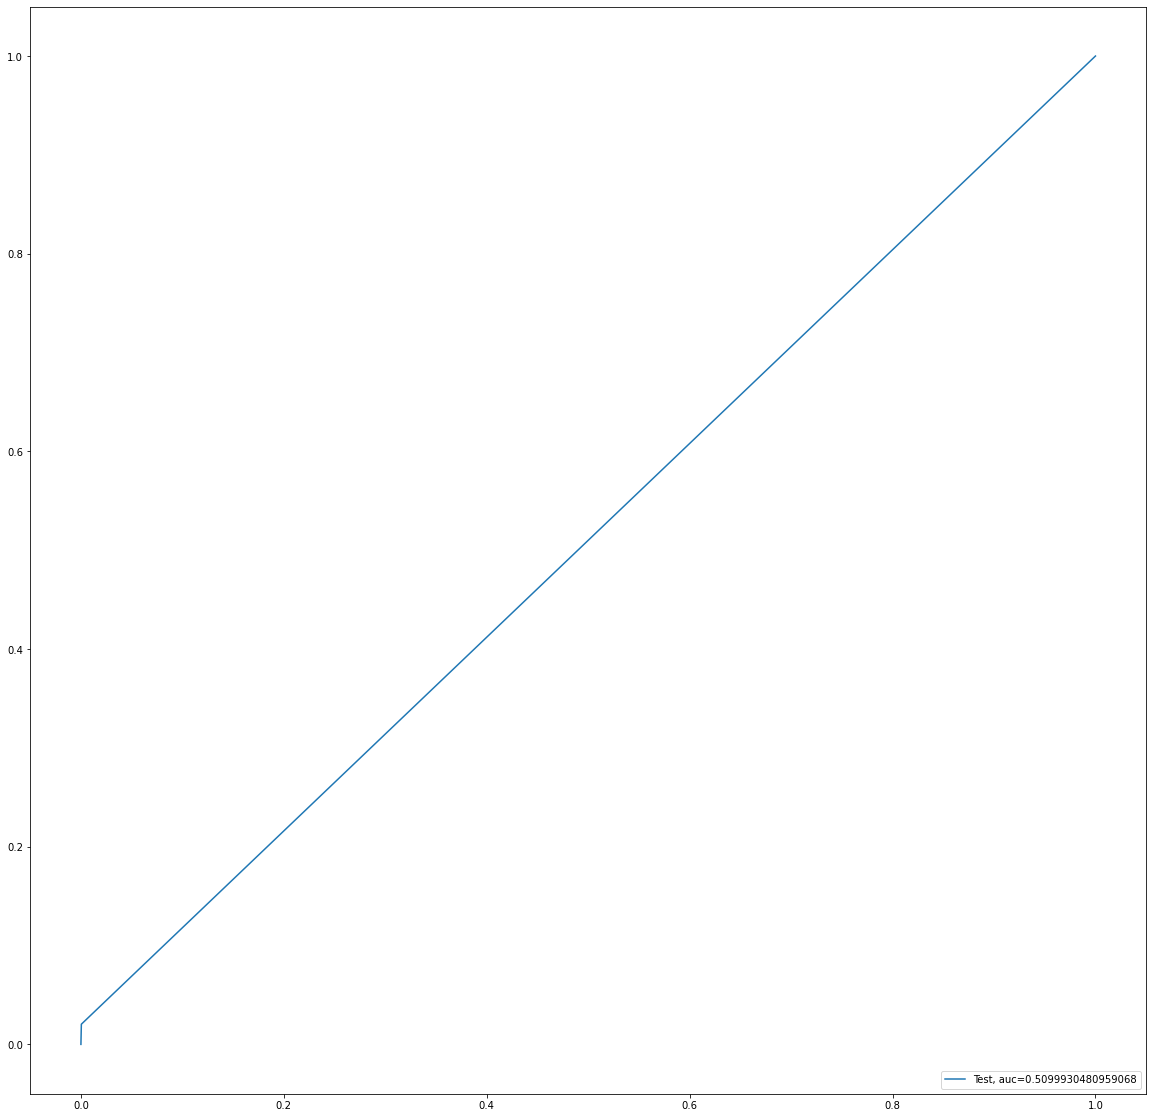

entropy score: 0.9989642035778866
Confusion Matrix


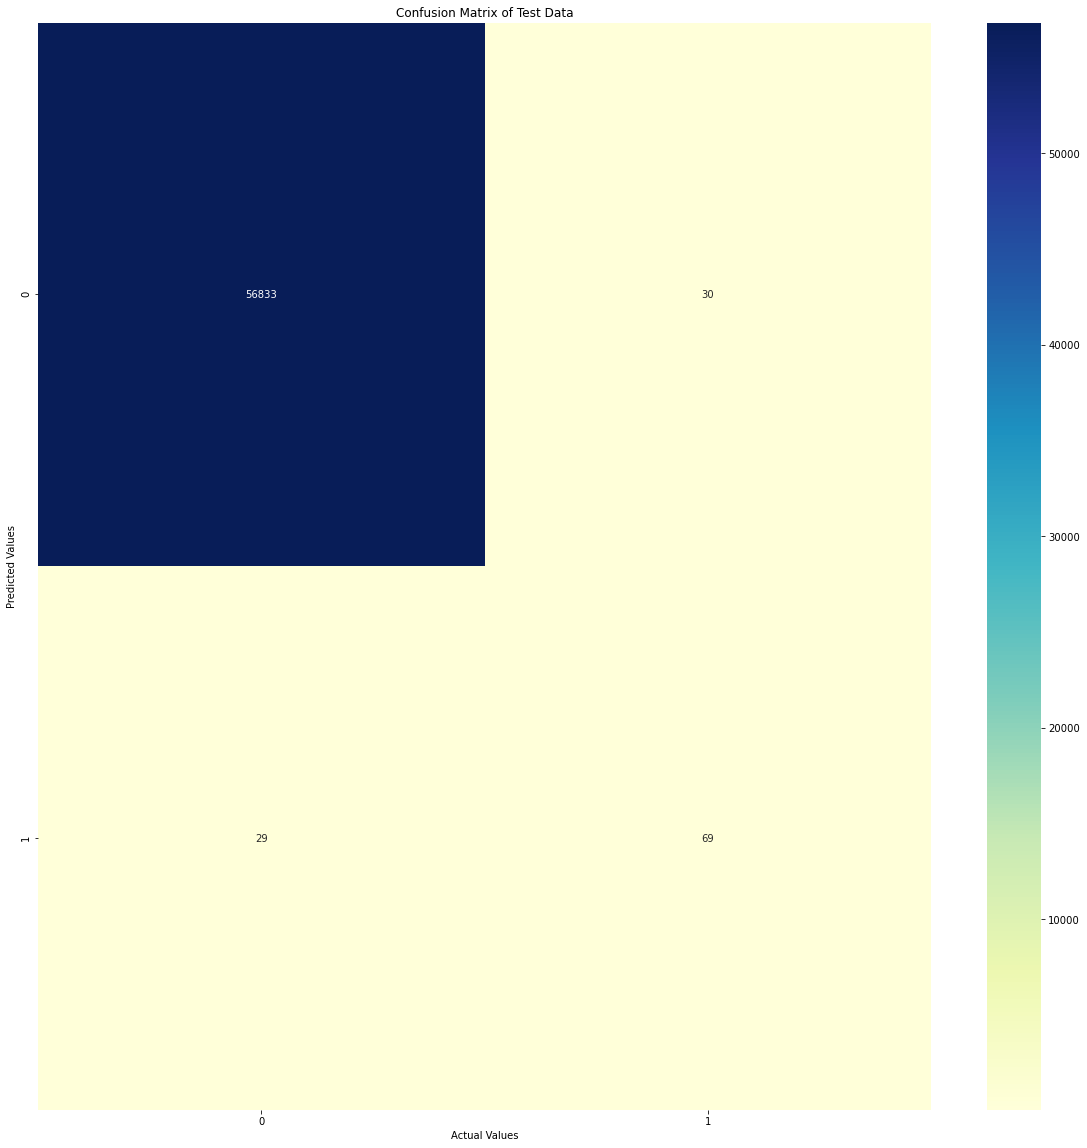

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.70      0.70      0.70        98

    accuracy                           1.00     56961
   macro avg       0.85      0.85      0.85     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8517770244055978
Tree threshold: 1.0
ROC for the test dataset 85.2%


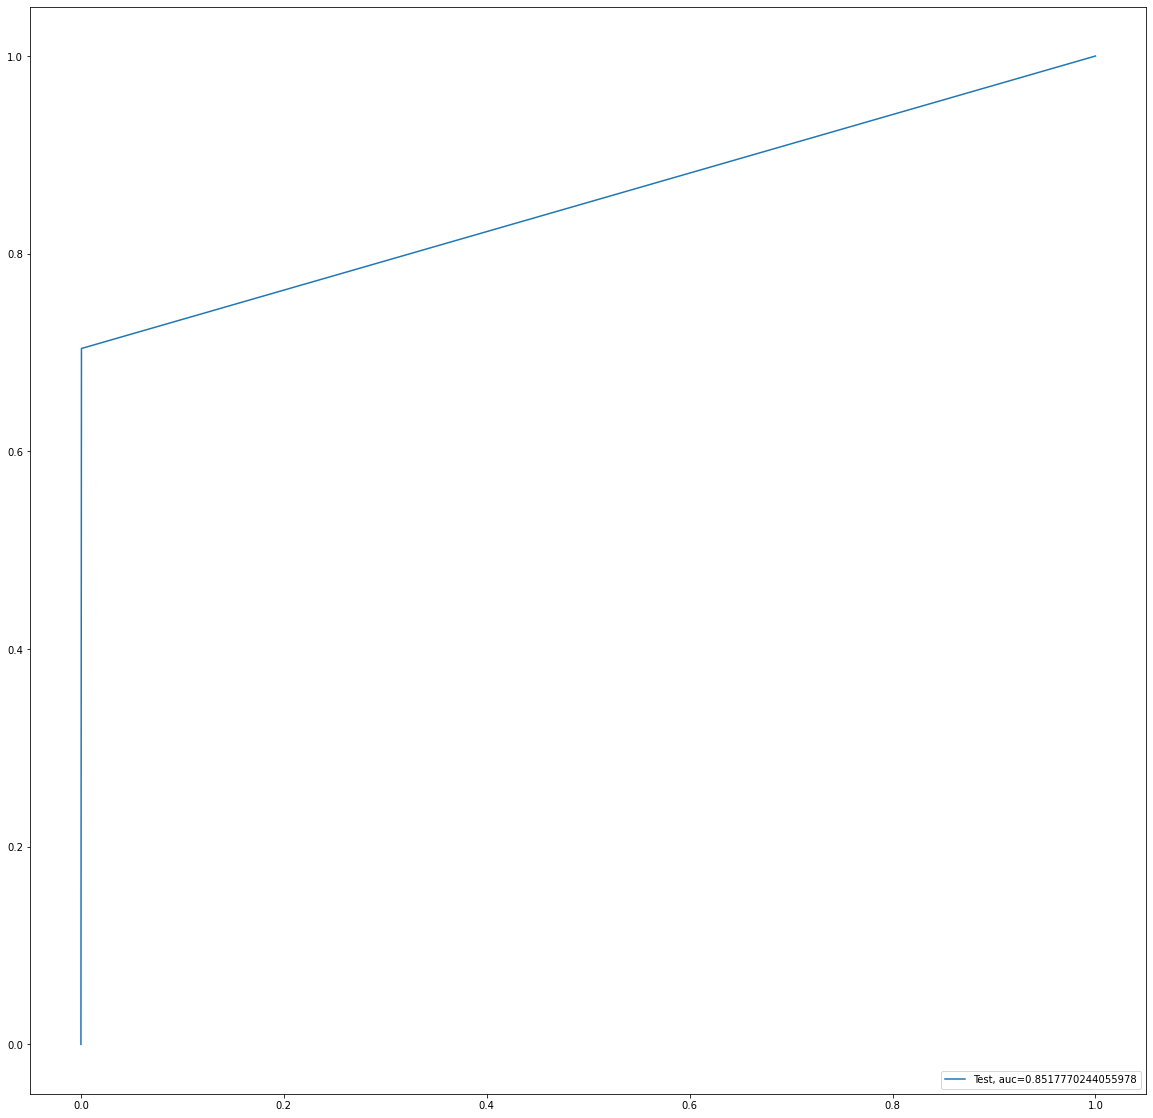

,Data_Imbalance_Handling,Model,Accuracy,roc_value
0,Balance_Random_OverSampling,Random Forest,0.999368,0.937143
1,Balance_Random_OverSampling,XGBoost,0.999473,0.966763
2,Balance_Random_Oversamples,Logistic Regression with L2 Regularisation,0.996331,0.978900
3,Balance_Random_Oversamples,Logistic Regression with L1 Regularisation,0.998280,0.500000
4,Balance_SMOTE,KNN,0.998280,0.500000


In [35]:
df_Results = DTModel(df_Results , 'Balance_SMOTE' , X_train_Smote, y_train_Smote, X_test, y_test)
df_Results.head()

#### RF Model

Model Accuracy: 0.999350432752234
Confusion Matrix


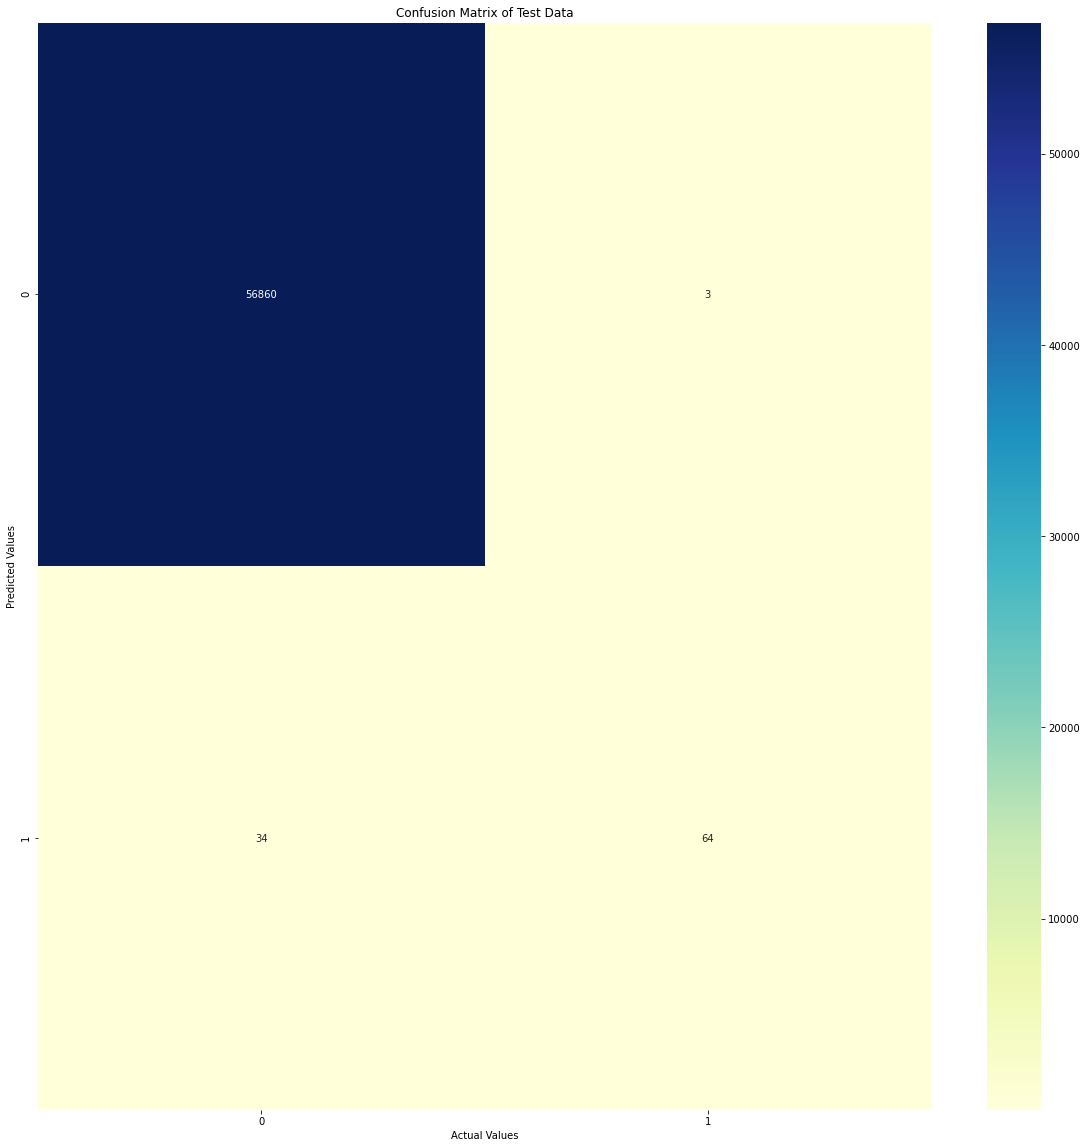

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.96      0.65      0.78        98

    accuracy                           1.00     56961
   macro avg       0.98      0.83      0.89     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9430364675282913
Random Forest threshold: 0.04
ROC for the test dataset 94.3%


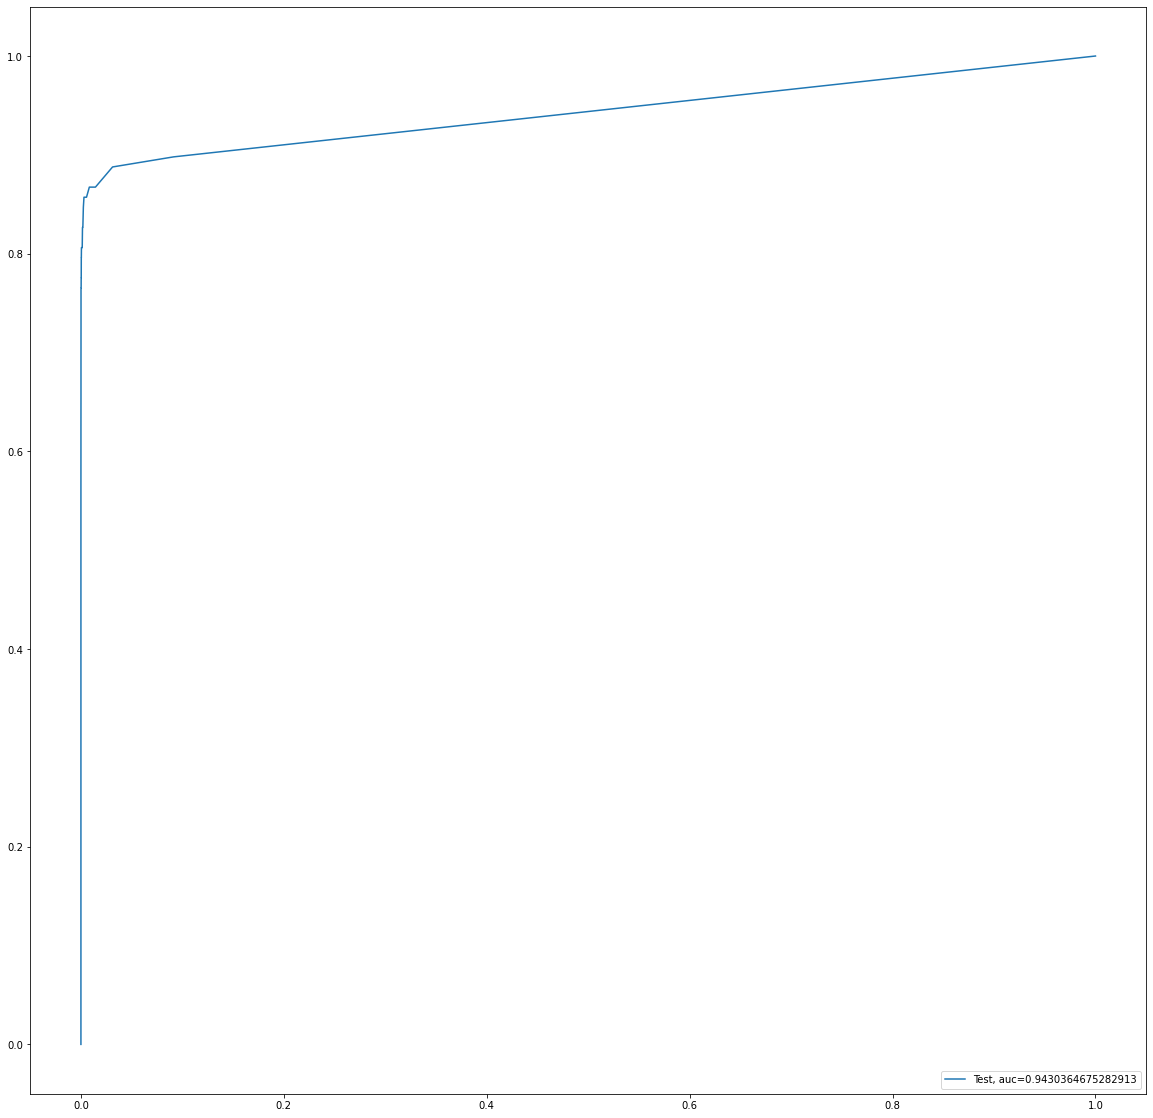

,Data_Imbalance_Handling,Model,Accuracy,roc_value
0,Balance_Random_OverSampling,Random Forest,0.999368,0.937143
1,Balance_Random_OverSampling,XGBoost,0.999473,0.966763
2,Balance_Random_Oversamples,Logistic Regression with L2 Regularisation,0.996331,0.978900
3,Balance_Random_Oversamples,Logistic Regression with L1 Regularisation,0.998280,0.500000
4,Balance_SMOTE,KNN,0.998280,0.500000


In [37]:
df_Results = RFModel(df_Results , 'Balance_SMOTE' , X_train_Smote, y_train_Smote, X_test, y_test)
df_Results.head()

#### XGBoost:

[21:31:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.9995259914678464
Confusion Matrix


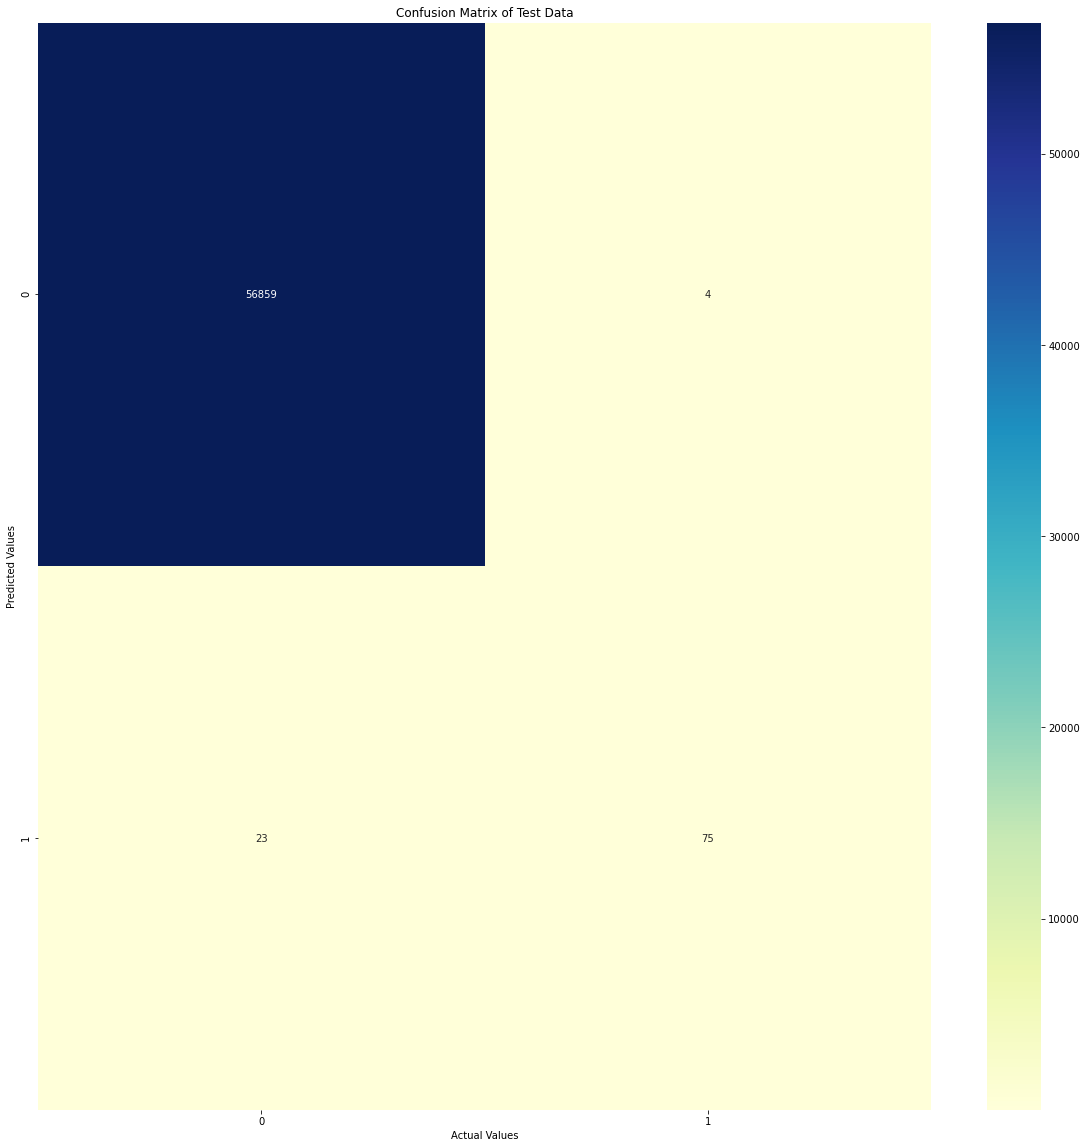

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.95      0.77      0.85        98

    accuracy                           1.00     56961
   macro avg       0.97      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9748547080756577
XGBoost threshold: 3.5174110962543637e-05
ROC for the test dataset 97.5%


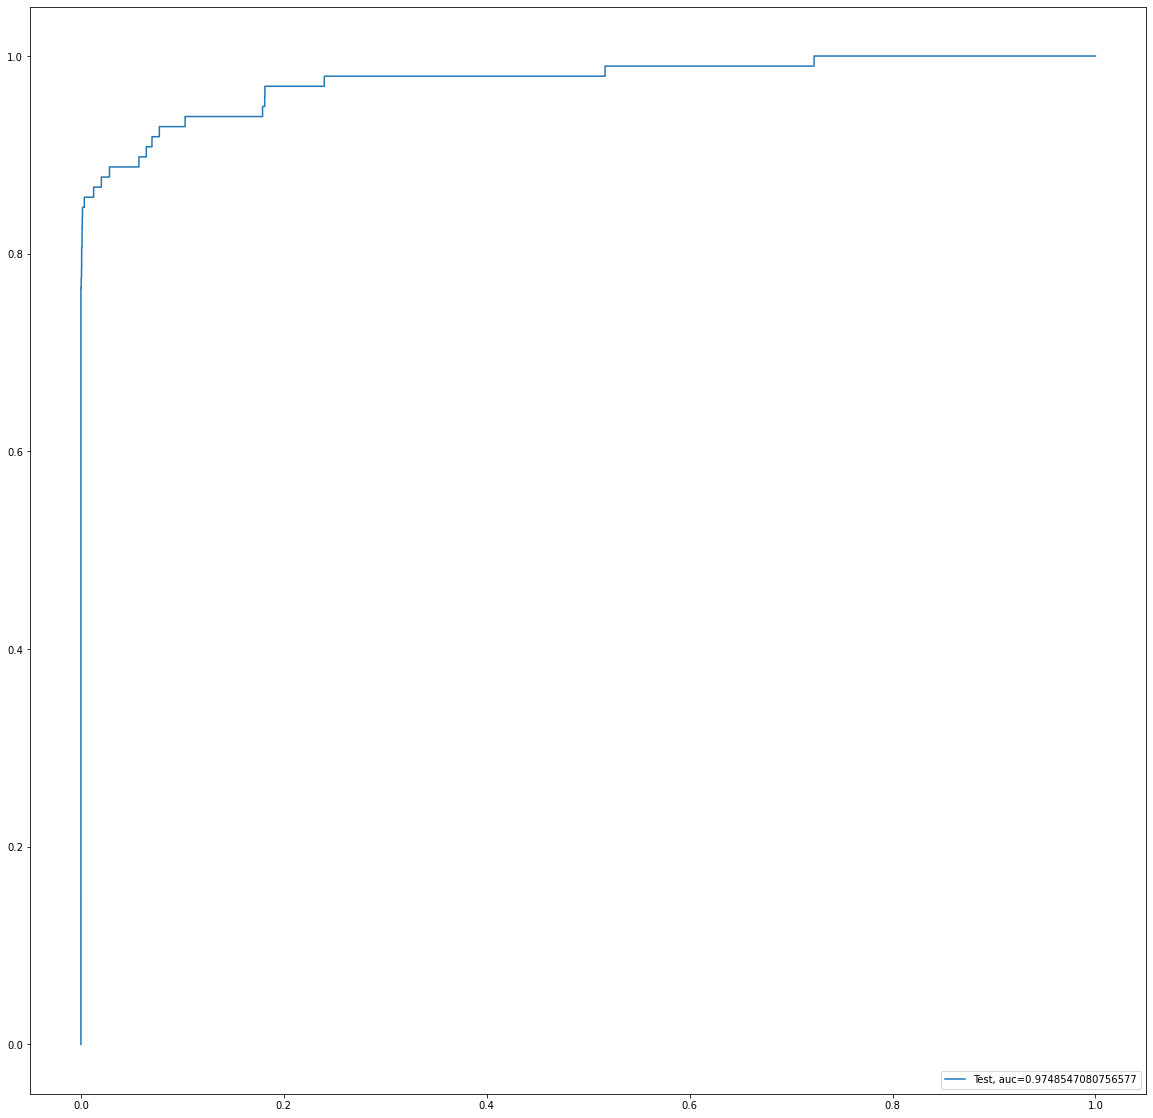

,Data_Imbalance_Handling,Model,Accuracy,roc_value
0,Balance_Random_OverSampling,Random Forest,0.999368,0.937143
1,Balance_Random_OverSampling,XGBoost,0.999473,0.966763
2,Balance_Random_Oversamples,Logistic Regression with L2 Regularisation,0.996331,0.978900
3,Balance_Random_Oversamples,Logistic Regression with L1 Regularisation,0.998280,0.500000
4,Balance_SMOTE,KNN,0.998280,0.500000


In [38]:
df_Results = XGMModel(df_Results , 'Balance_SMOTE' , X_train_Smote, y_train_Smote, X_test, y_test)
df_Results.head()

- XGBoost is performing the best in terms of F1 score and ROC value for SMOTE balanced dataset.

### Print the class distribution after applying ADASYN

In [40]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)
ADASYN = over_sampling.ADASYN(random_state=0)
for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    #SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_ADASYN, y_train_ADASYN= ADASYN.fit_resample(X_train, y_train)
  
#Create Dataframe for X_over
X_train_ADASYN = pd.DataFrame(data=X_train_ADASYN,   columns=cols)

In [43]:
y_train_ADASYN.value_counts()

0    227452
1    227385
Name: Class, dtype: int64

In [44]:
y_train.value_counts()

0    227452
1       394
Name: Class, dtype: int64

In [45]:
y_test.value_counts()

0    56863
1       98
Name: Class, dtype: int64

##### Build models on other algorithms to see the better performing on ADASYN

#### LR Model

Max auc_roc for l2: 0.9974704701844219
Max auc_roc for l1: 0.5
Accuracy of Logistic model with l2 regularisation : 0.9959270377977915
Confusion Matrix


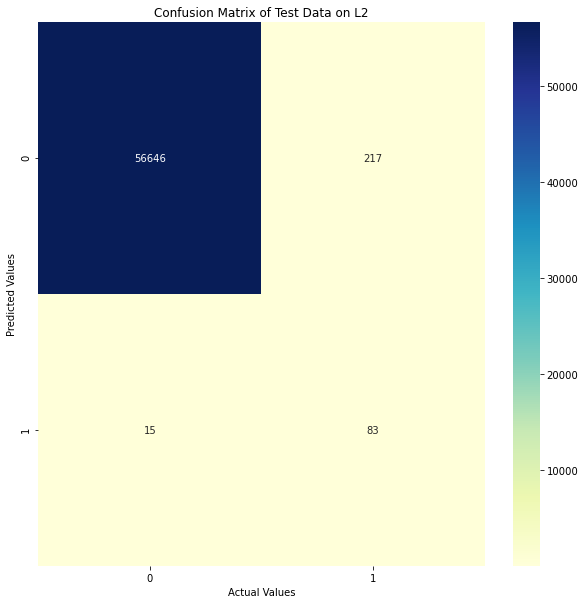

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.28      0.85      0.42        98

    accuracy                           1.00     56961
   macro avg       0.64      0.92      0.71     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix


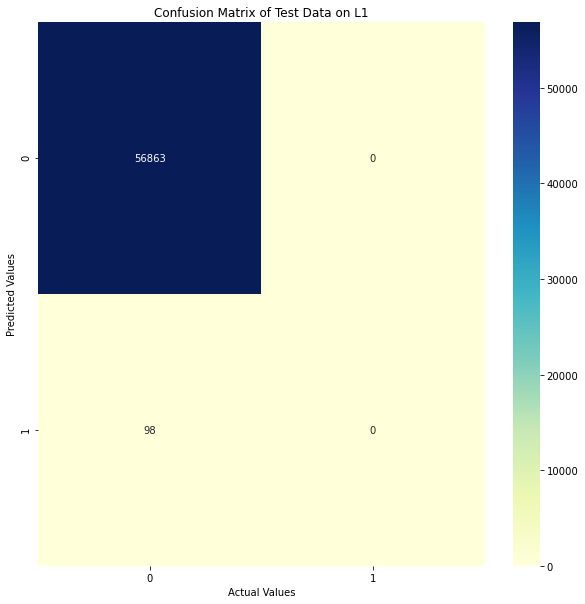

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9788926984190788
l2 threshold: 0.07315031353815063
ROC for the test dataset 97.9%


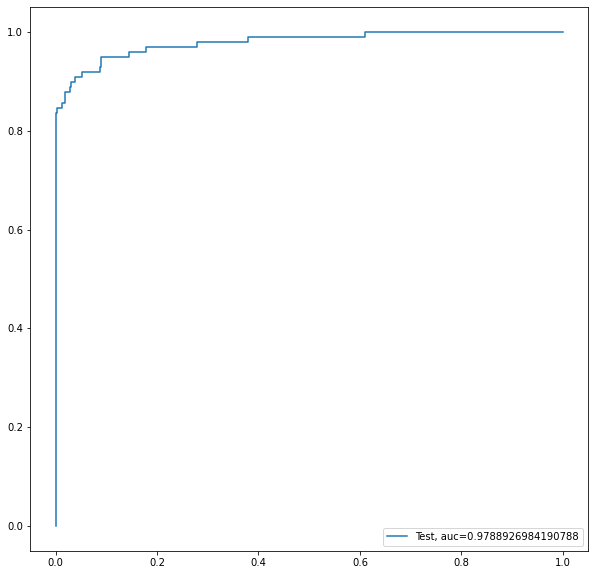

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


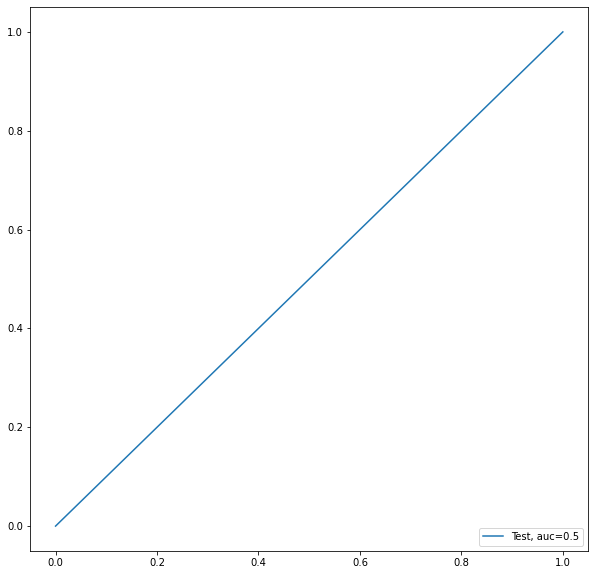

,Data_Imbalance_Handling,Model,Accuracy,roc_value
0,Balance_Random_OverSampling,Random Forest,0.999368,0.937143
1,Balance_Random_OverSampling,XGBoost,0.999473,0.966763
2,Balance_Random_Oversamples,Logistic Regression with L2 Regularisation,0.996331,0.978900
3,Balance_Random_Oversamples,Logistic Regression with L1 Regularisation,0.998280,0.500000
4,Balance_SMOTE,KNN,0.998280,0.500000


In [46]:
df_Results = LRModel(df_Results , 'Balance_ADASYN' , X_train_ADASYN, y_train_ADASYN, X_test, y_test)
df_Results.head()

#### KNN :

Model score
0.9982795245869981
Confusion Matrix


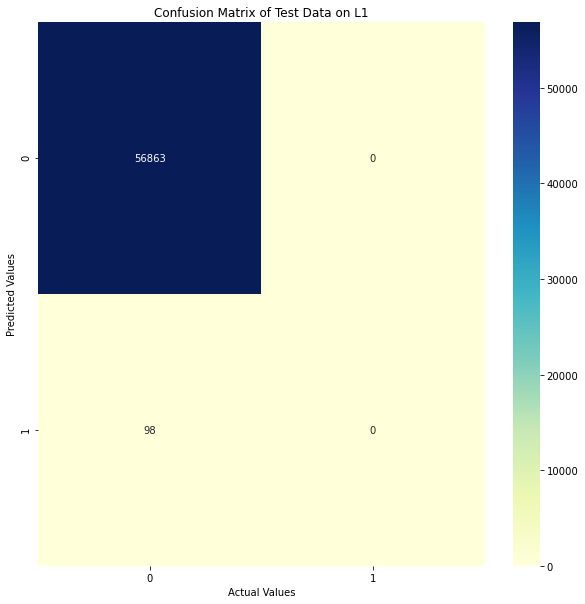

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.5
KNN threshold: 1.0
ROC for the test dataset 50.0%


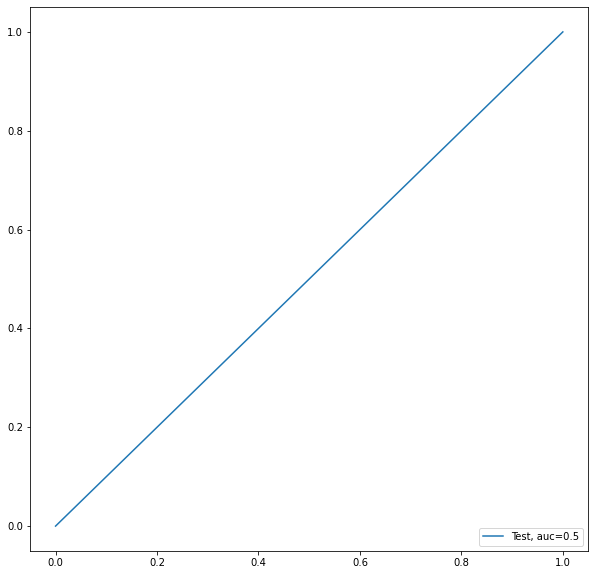

,Data_Imbalance_Handling,Model,Accuracy,roc_value
0,Balance_Random_OverSampling,Random Forest,0.999368,0.937143
1,Balance_Random_OverSampling,XGBoost,0.999473,0.966763
2,Balance_Random_Oversamples,Logistic Regression with L2 Regularisation,0.996331,0.978900
3,Balance_Random_Oversamples,Logistic Regression with L1 Regularisation,0.998280,0.500000
4,Balance_SMOTE,KNN,0.998280,0.500000


In [47]:
df_Results = KNNModel(df_Results , 'Balance_ADASYN' , X_train_ADASYN, y_train_ADASYN, X_test, y_test)
df_Results.head()

#### DECISION TREE

gini score: 0.9977528484401608
Confusion Matrix


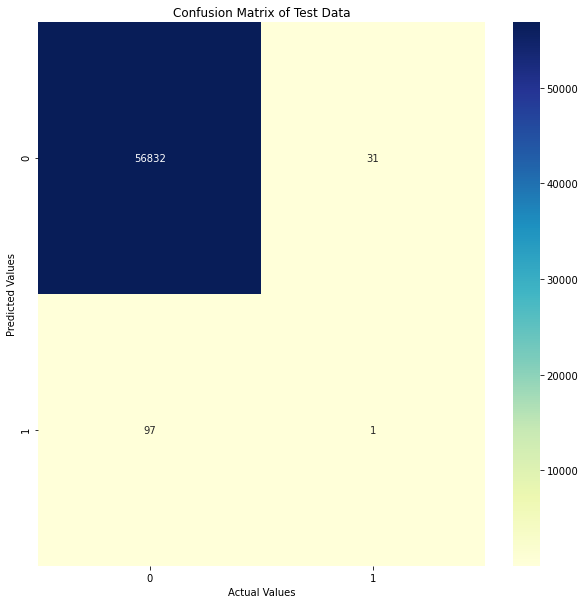

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.03      0.01      0.02        98

    accuracy                           1.00     56961
   macro avg       0.51      0.50      0.51     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.5048294558313626
Tree threshold: 1.0
ROC for the test dataset 50.5%


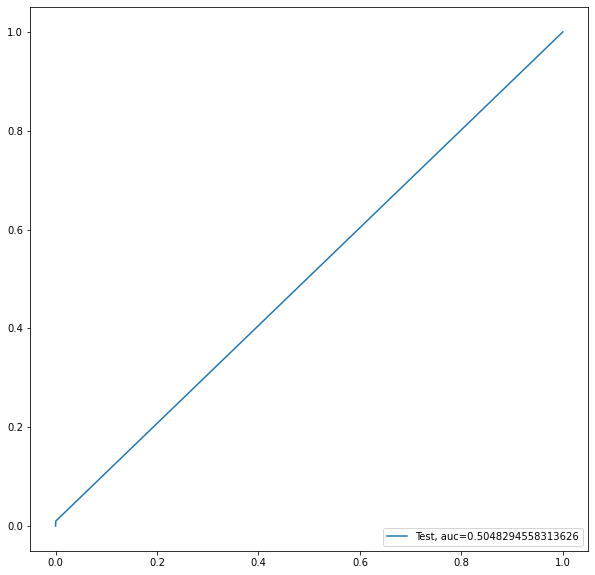

entropy score: 0.9990344270641316
Confusion Matrix


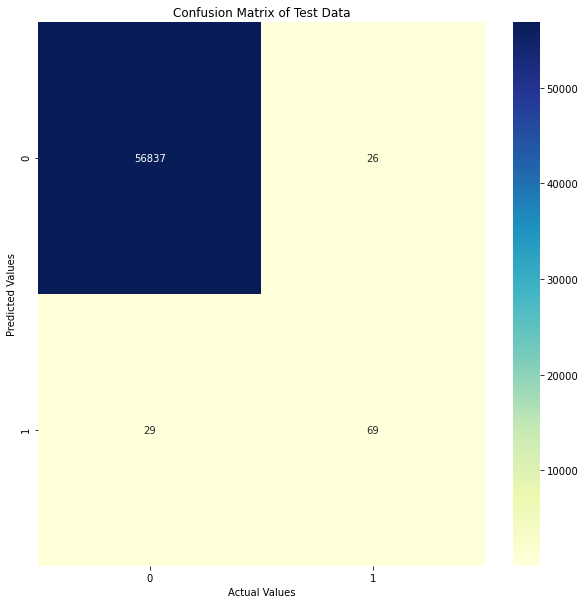

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.73      0.70      0.72        98

    accuracy                           1.00     56961
   macro avg       0.86      0.85      0.86     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8518121966617221
Tree threshold: 1.0
ROC for the test dataset 85.2%


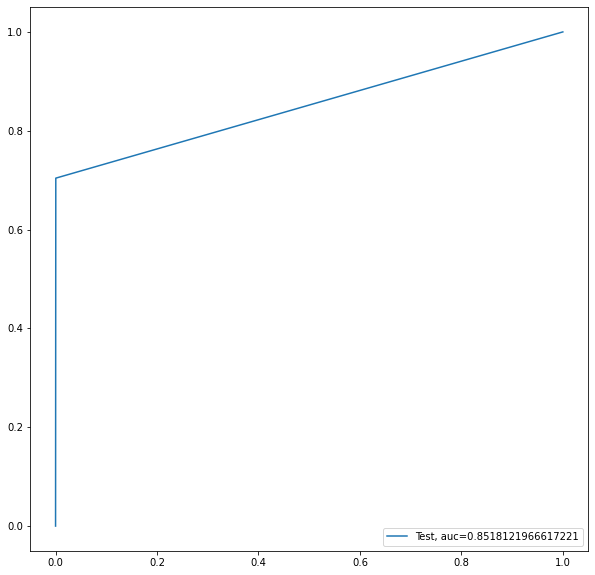

,Data_Imbalance_Handling,Model,Accuracy,roc_value
0,Balance_Random_OverSampling,Random Forest,0.999368,0.937143
1,Balance_Random_OverSampling,XGBoost,0.999473,0.966763
2,Balance_Random_Oversamples,Logistic Regression with L2 Regularisation,0.996331,0.978900
3,Balance_Random_Oversamples,Logistic Regression with L1 Regularisation,0.998280,0.500000
4,Balance_SMOTE,KNN,0.998280,0.500000


In [48]:
df_Results = DTModel(df_Results , 'Balance_ADASYN' , X_train_ADASYN, y_train_ADASYN, X_test, y_test)
df_Results.head()

#### RF Model

Model Accuracy: 0.999350432752234
Confusion Matrix


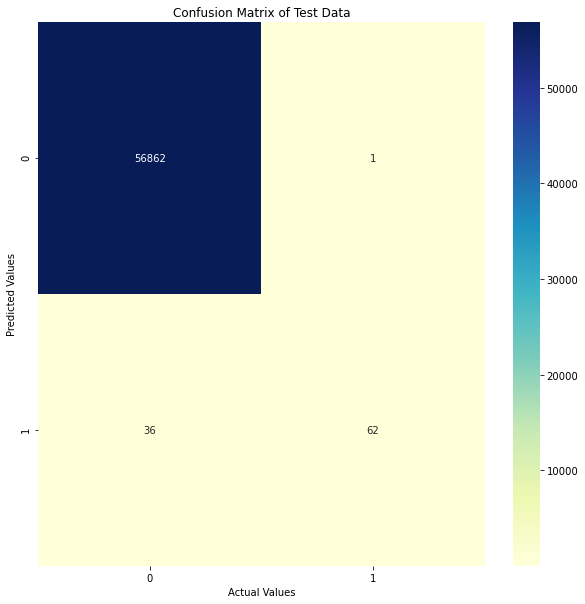

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.98      0.63      0.77        98

    accuracy                           1.00     56961
   macro avg       0.99      0.82      0.88     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9477693791055982
Random Forest threshold: 0.07
ROC for the test dataset 94.8%


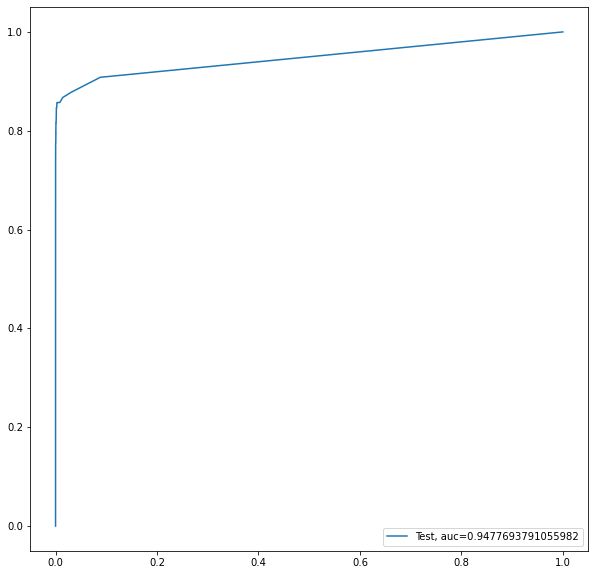

,Data_Imbalance_Handling,Model,Accuracy,roc_value
0,Balance_Random_OverSampling,Random Forest,0.999368,0.937143
1,Balance_Random_OverSampling,XGBoost,0.999473,0.966763
2,Balance_Random_Oversamples,Logistic Regression with L2 Regularisation,0.996331,0.978900
3,Balance_Random_Oversamples,Logistic Regression with L1 Regularisation,0.998280,0.500000
4,Balance_SMOTE,KNN,0.998280,0.500000


In [49]:
df_Results = RFModel(df_Results , 'Balance_ADASYN' , X_train_ADASYN, y_train_ADASYN, X_test, y_test)
df_Results.head()

#### XGBoost:

[22:07:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.9995084355962852
Confusion Matrix


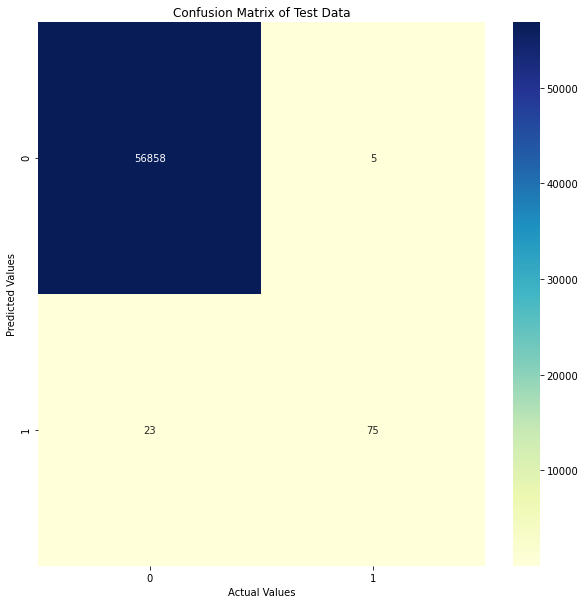

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.94      0.77      0.84        98

    accuracy                           1.00     56961
   macro avg       0.97      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9681753889674681
XGBoost threshold: 2.6458577849552967e-05
ROC for the test dataset 96.8%


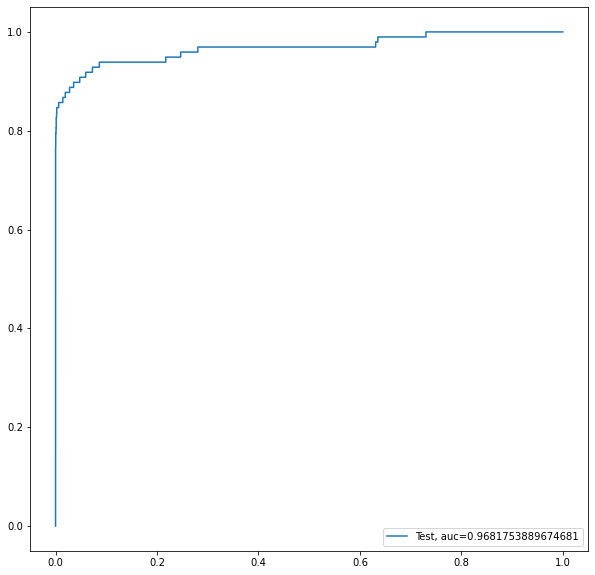

,Data_Imbalance_Handling,Model,Accuracy,roc_value
0,Balance_Random_OverSampling,Random Forest,0.999368,0.937143
1,Balance_Random_OverSampling,XGBoost,0.999473,0.966763
2,Balance_Random_Oversamples,Logistic Regression with L2 Regularisation,0.996331,0.978900
3,Balance_Random_Oversamples,Logistic Regression with L1 Regularisation,0.998280,0.500000
4,Balance_SMOTE,KNN,0.998280,0.500000


In [50]:
df_Results = XGMModel(df_Results , 'Balance_ADASYN' , X_train_ADASYN, y_train_ADASYN, X_test, y_test)
df_Results.head()

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

- SMOTE XGBOOST Model is performing the best:

In [17]:
clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=1, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)
clf.fit(X_train_Smote, y_train_Smote) # fit on the balanced dataset
XGB_test_score = clf.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = clf.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9995259914678464
XGboost roc_value: 0.9682570388477569
XGBoost threshold: 0.0011369229760020971


### Print the important features of the best model to understand the dataset

Top var = 15
2nd Top var = 11
3rd Top var = 13


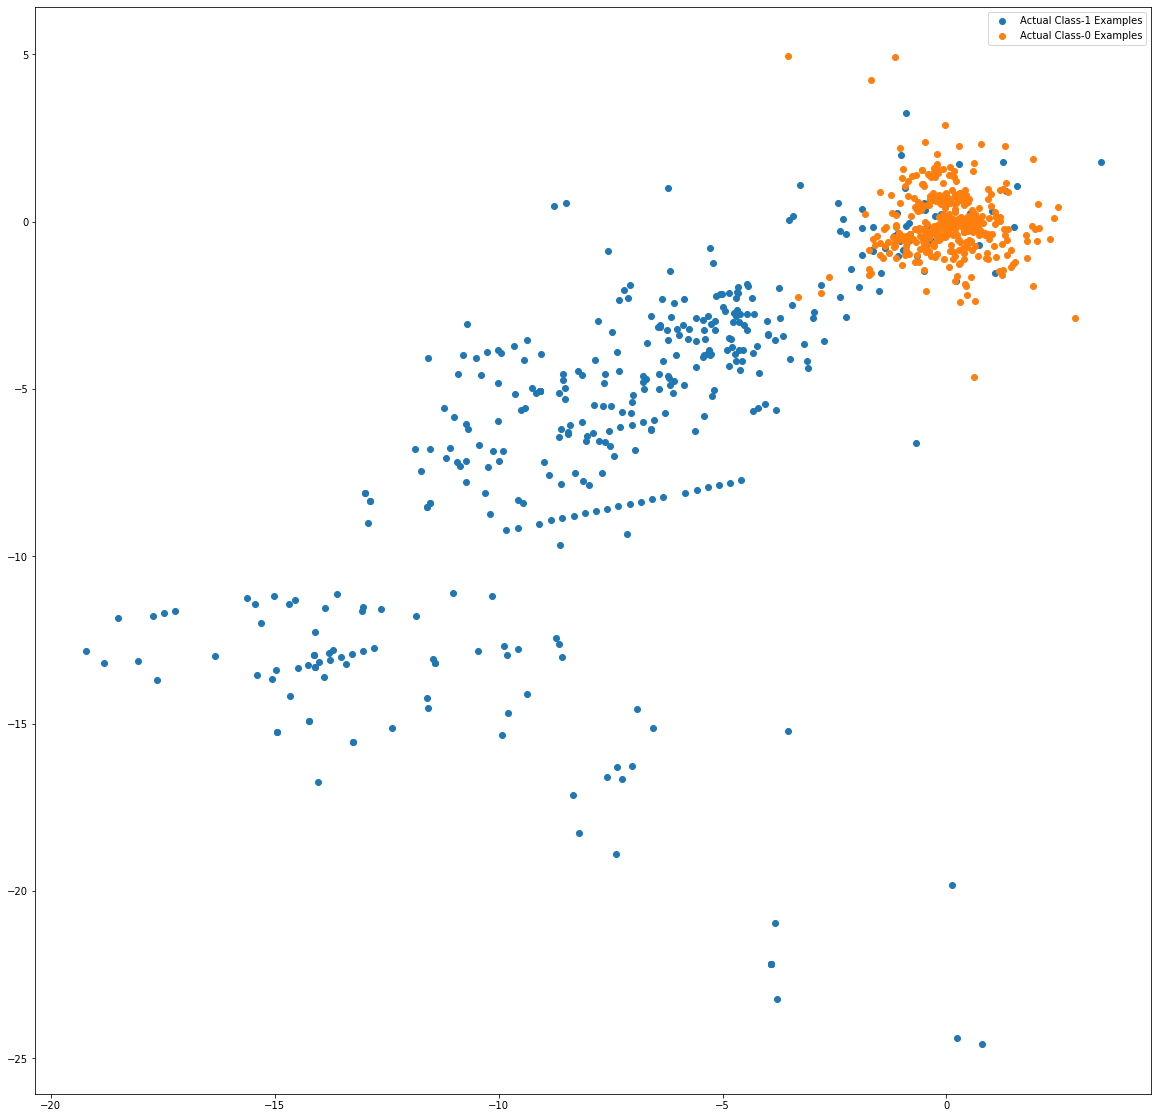

In [18]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [19]:
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

XGboost roc_value: 0.9682570388477569
XGBoost threshold: 0.0011369229760020971


## Model Selection:

**XGBOOST model with SMOTE Oversampling with StratifiedKFold CV has provided best results.**


**Model Accuracy: 0.9995259914678464**

**XGboost roc_value: 0.9682570388477569**

**XGBoost threshold: 0.0011369229760020971**

### On imbalanced data,	Random Forest with RandomsearchCV 5 fold Cross Validation has been provided best results.